In [1]:
from sunpy.net import hek
from sunpy.net import hek2vso
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib qt
import shapely
from shapely.wkt import dumps, loads
import numpy as np
import pandas as pd
from shapely.geometry.polygon import LinearRing, Polygon
from datetime import timedelta
import datetime
from sunpy.time import *
from dateutil.parser import parse
import matplotlib.cm as cm
import matplotlib as mpl
from operator import itemgetter
from itertools import groupby
import itertools
import operator
from datetime import timedelta
import csv
import dateutil
import time 

# Getting Data 2012

In [2]:
#### opens csv file for non-erupting/transit filaments 2012
tracknumbers_2012_trans=[]
good_track_no_2012_trans=[]
with open('Transit_tracks2012.csv', 'rb') as f:    ###opens the excel document containing confirmed eruption track information
    reader = csv.reader(f)
    vdata = [row for row in csv.reader(f.read().splitlines())]   #splits the document by line
for row in vdata:
    tracknumbers_2012_trans.append(row[0])      ###appends just the track number
for i in range(0, 2):
    tracknumbers_2012_trans.pop(i)     #removes heading text for file 
del tracknumbers_2012_trans[0]
##########
for item in tracknumbers_2012_trans:      
    x=float(item)
    good_track_no_2012_trans.append(x)  #appends the track numbers as a float to a new list 
print good_track_no_2012_trans

[160.0, 223.0, 389.0, 407.0, 533.0, 858.0, 939.0, 1090.0, 1118.0, 1212.0, 1265.0, 1303.0, 1304.0, 1500.0, 1693.0, 1700.0, 1741.0, 1917.0, 1922.0, 1928.0, 1930.0, 2004.0, 2087.0, 2151.0, 2155.0, 2255.0, 2282.0, 2397.0, 2466.0, 2838.0]


In [3]:
fi_tracked2012 = pd.read_csv('FIDustinTracked_2012.txt',delimiter='\t')   ##working with filament data 
fi_tracked2012.head()
good_tracks2012 = fi_tracked2012.groupby('Track No.').filter(lambda x: len(x['Track No.']) >= 3, dropna=False) 

In [4]:
###selects the data of interest by csv track numbers 
inds_trans=[]
for i in range(0, len(good_tracks2012)):
    if good_tracks2012['Track No.'][i] in good_track_no_2012_trans:
        inds_trans.append(i)
working_data_2012_trans=good_tracks2012.ix[inds_trans]

# Splitting data between North and South

# Getting Data Oct. 2013

In [5]:
#### for non-erupting/transit filaments 2013
tracknumbers_oct_2013_trans=[]
good_track_no_oct_2013_trans=[]
with open('Transit_tracks_oct_2013.csv', 'rb') as f:    ###opens the excel document containing confirmed eruption track information
    reader = csv.reader(f)
    vdata = [row for row in csv.reader(f.read().splitlines())]   #splits the document by line
for row in vdata:
    tracknumbers_oct_2013_trans.append(row[0])      ###appends just the track number
for i in range(0, 2):
    tracknumbers_oct_2013_trans.pop(i)     #removes heading text for file 
del tracknumbers_oct_2013_trans[0]
##########
for item in tracknumbers_oct_2013_trans:
    if item != '':
        good_track_no_oct_2013_trans.append(float(item))  #appends the track numbers as a float to a new list
print good_track_no_oct_2013_trans

[23.0, 72.0, 97.0, 150.0, 152.0, 154.0, 166.0, 185.0]


In [6]:
###reads in filament track metadata
fi_tracked_oct_2013 = pd.read_csv('FIDustinTracked_2013_10.txt',delimiter='\t')   ##working with filament data 
fi_tracked_oct_2013.head()
good_tracks_oct_2013 = fi_tracked_oct_2013.groupby('Track No.').filter(lambda x: len(x['Track No.']) >= 3, dropna=False) 

In [7]:
inds_trans=[]
for i in range(0, len(good_tracks_oct_2013)):
    if good_tracks_oct_2013['Track No.'][i] in good_track_no_oct_2013_trans:
        inds_trans.append(i)
working_data_oct_2013_trans = good_tracks_oct_2013.ix[inds_trans]

# Splitting between North and South

In [8]:
xvals = [loads(elem).x for elem in working_data_2012_trans['HPC_Center']]
working_data_2012_trans['xcen'] = xvals
yvals = [loads(elem).y for elem in working_data_2012_trans['HPC_Center']]
working_data_2012_trans['ycen'] = yvals 

north_filaments_2012 = working_data_2012_trans.groupby("Track No.").filter(lambda x: sum(x['ycen']) > 0)
south_filaments_2012 = working_data_2012_trans.groupby("Track No.").filter(lambda x: sum(x['ycen']) <= 0)

south_groups_2012 = south_filaments_2012.groupby("Track No.")
north_groups_2012 = north_filaments_2012.groupby("Track No.")


north_trx_2012_trans=north_filaments_2012['Track No.']
north_trx_2012_trans=np.unique(north_trx_2012_trans)
south_trx_2012_trans=south_filaments_2012['Track No.']
south_trx_2012_trans=np.unique(south_trx_2012_trans)

In [9]:
xvals = [loads(elem).x for elem in working_data_oct_2013_trans['HPC_Center']]
working_data_oct_2013_trans['xcen'] = xvals
yvals = [loads(elem).y for elem in working_data_oct_2013_trans['HPC_Center']]
working_data_oct_2013_trans['ycen'] = yvals 

north_filaments_2013 = working_data_oct_2013_trans.groupby("Track No.").filter(lambda x: sum(x['ycen']) > 0)
south_filaments_2013 = working_data_oct_2013_trans.groupby("Track No.").filter(lambda x: sum(x['ycen']) <= 0)

south_groups_2013 = south_filaments_2013.groupby("Track No.")
north_groups_2013 = north_filaments_2013.groupby("Track No.")

north_trx_2013_trans=north_filaments_2013['Track No.']
north_trx_2013_trans=np.unique(north_trx_2013_trans)
south_trx_2013_trans=south_filaments_2013['Track No.']
south_trx_2013_trans=np.unique(south_trx_2013_trans)

# Smashing together!

In [10]:
all_tracks_trans=[]
length_2012=working_data_2012_trans['fi_length']
time_2012=working_data_2012_trans['HEK_time']
track_2012=working_data_2012_trans['Track No.']
chiral_2012= working_data_2012_trans['fi_chirality']
tilt_2012 = working_data_2012_trans['fi_tilt']
plot_length_data_2012_trans=zip(track_2012, time_2012, length_2012, chiral_2012, tilt_2012)
###############################################
length_2013_10=working_data_oct_2013_trans['fi_length']
time_2013_10=working_data_oct_2013_trans['HEK_time']
track_2013_10=working_data_oct_2013_trans['Track No.']
chiral_2013_10= working_data_oct_2013_trans['fi_chirality']
tilt_2013_10 = working_data_oct_2013_trans['fi_tilt']
norm_track_2013=[]
norm_north_track_2013=[]
norm_south_track_2013=[]

for tr in track_2013_10:
    new = tr + 3000
    norm_track_2013.append(new)
for tr1 in north_trx_2013_trans:
    new1 = tr1 + 3000
    norm_north_track_2013.append(new1)
for tr2 in south_trx_2013_trans:
    new2 = tr2 + 3000
    norm_south_track_2013.append(new2)
plot_length_data_2013_trans=zip(norm_track_2013, time_2013_10, length_2013_10, chiral_2013_10, tilt_2013_10)
#track number, track time, length, chirality
all_data_trans=plot_length_data_2012_trans+plot_length_data_2013_trans
all_north_trans = list(set(north_trx_2012_trans) | set(norm_north_track_2013) )
all_south_trans = list(set(south_trx_2012_trans) | set(norm_south_track_2013) )
for element in all_data_trans:
    all_tracks_trans.append(element[0])

# Length Analysis

-7067.10678596


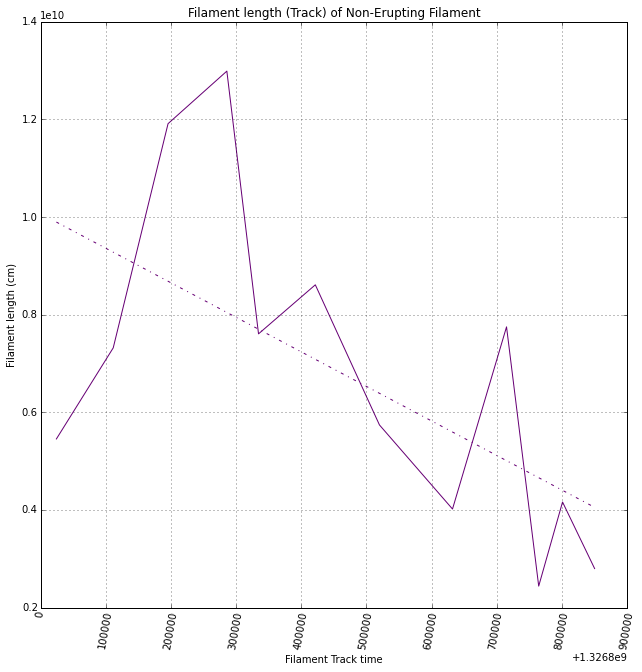

-12722.536751


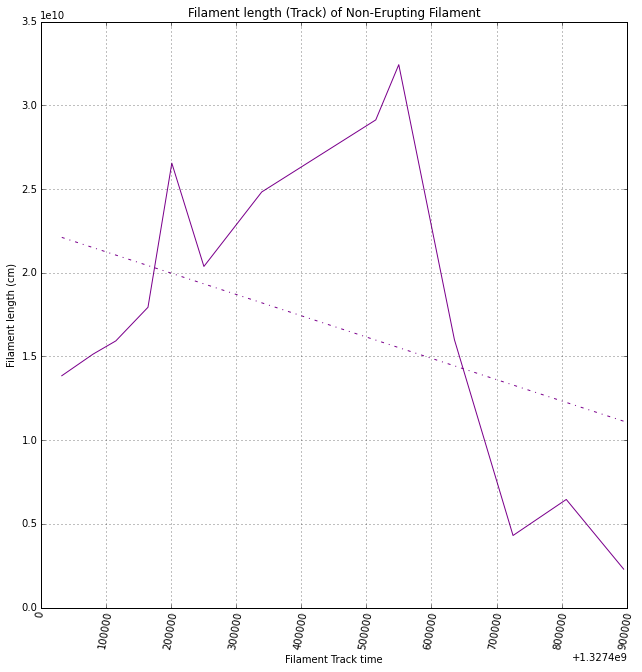

-7033.14184782


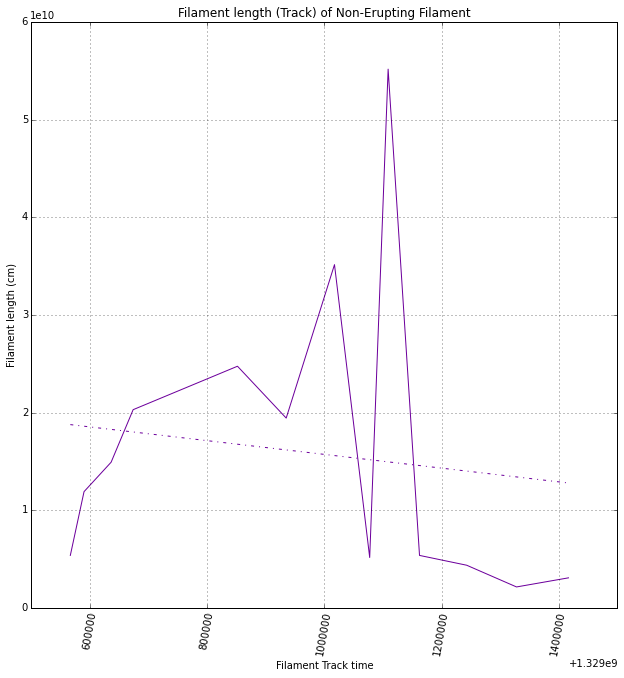

-19542.9111143


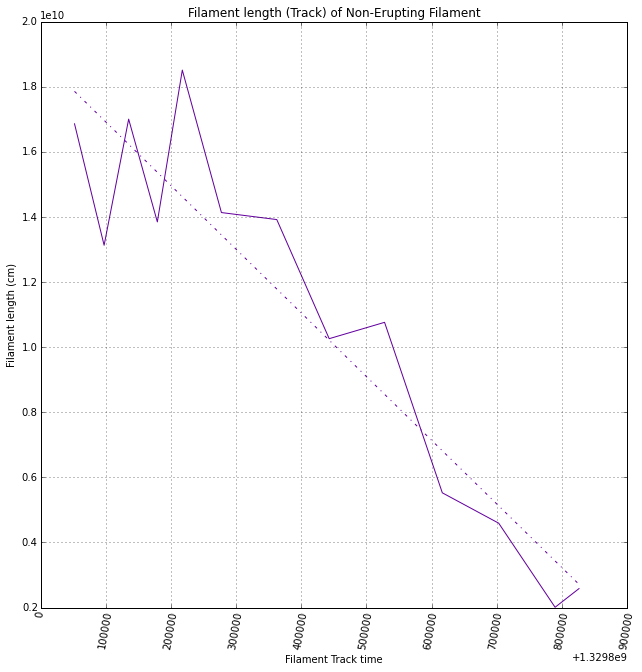

734.35319406


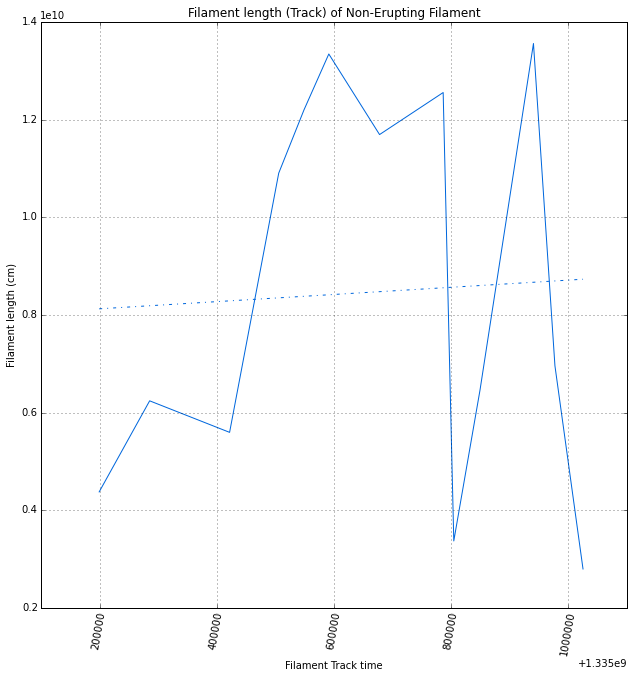

-2324.15312928


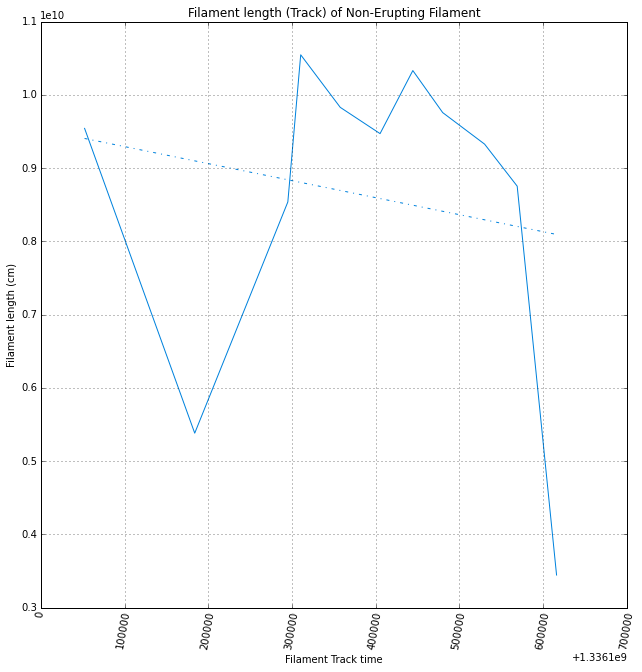

783.96791219


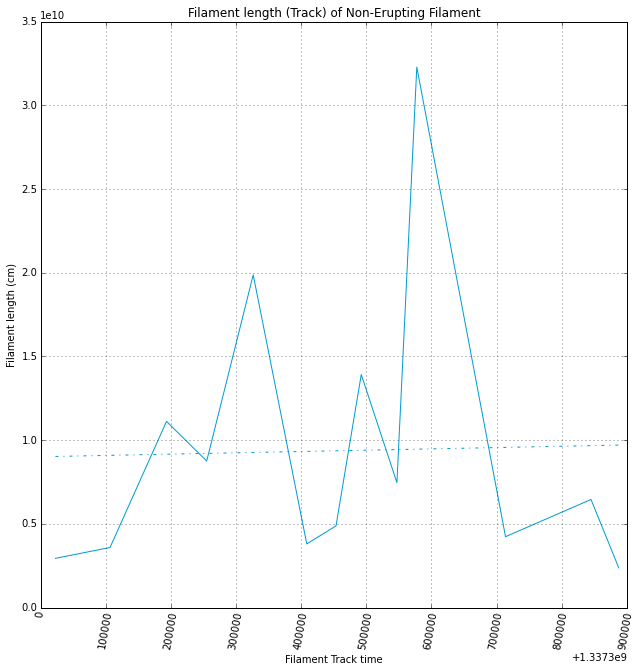

15463.2783622


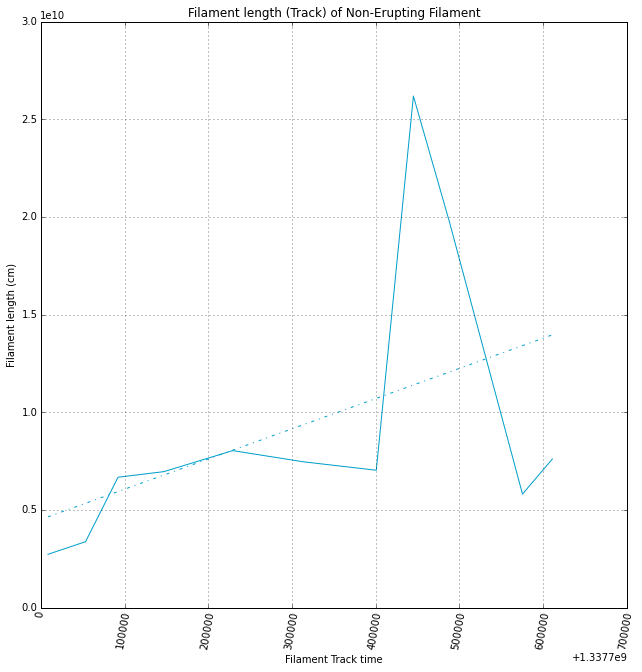

11278.0978171


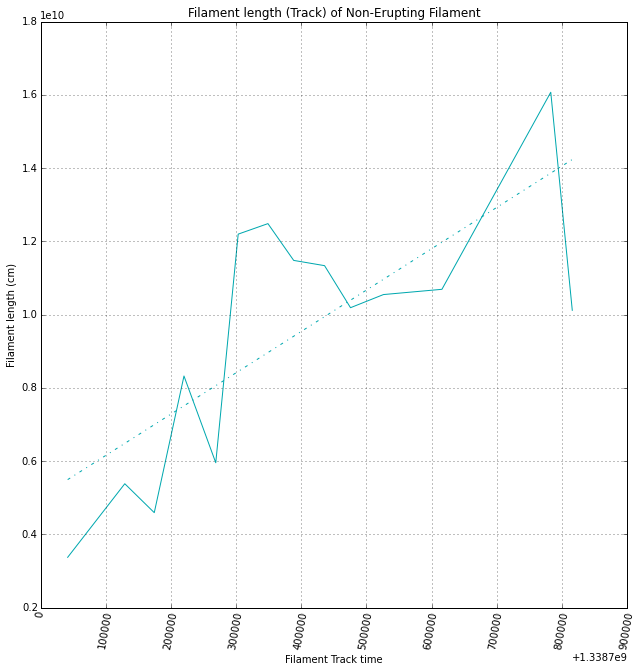

-3150.74793166


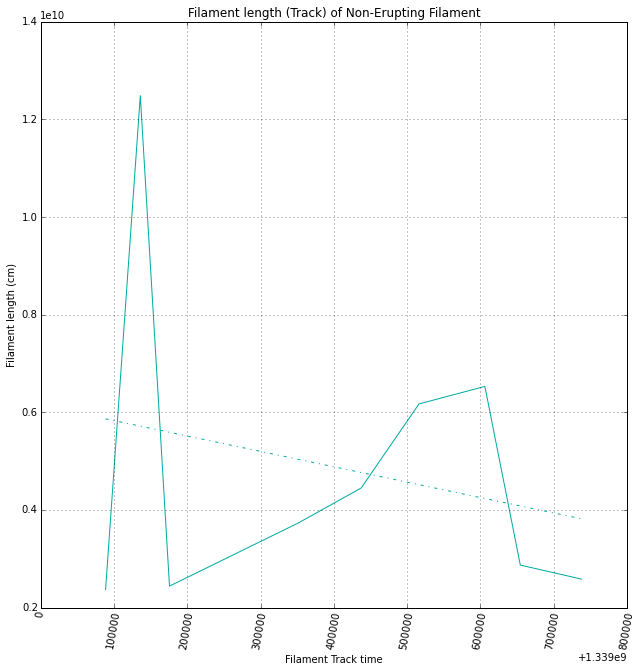

-661.169593469


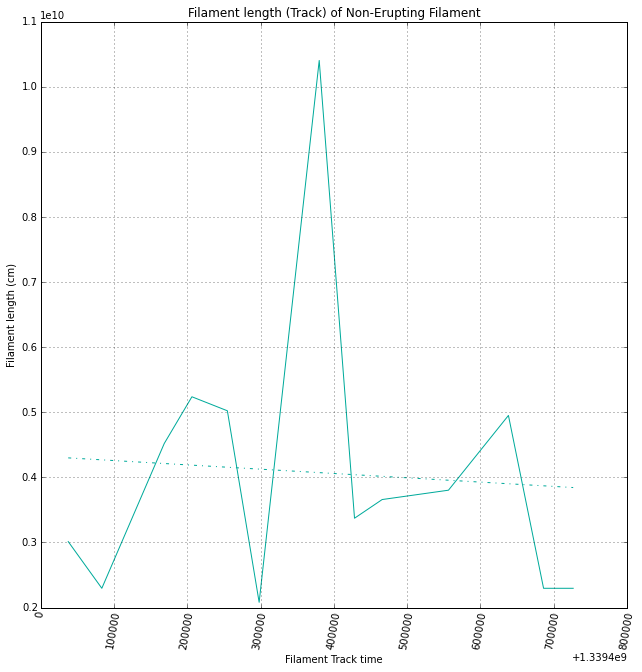

1052.80473978


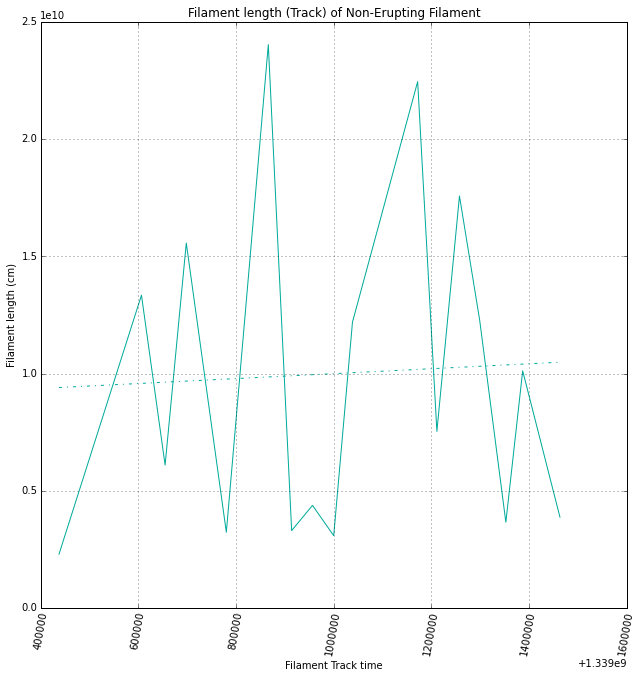

-10796.747496


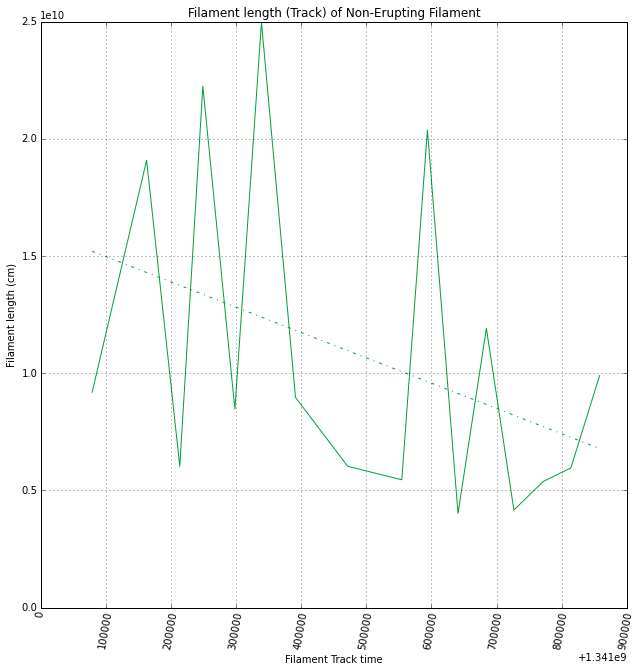

-2321.0099319


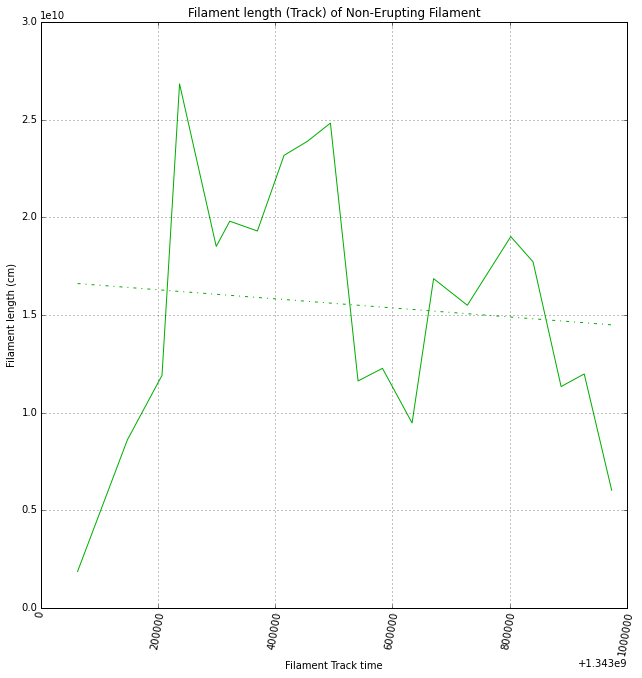

4293.7333207


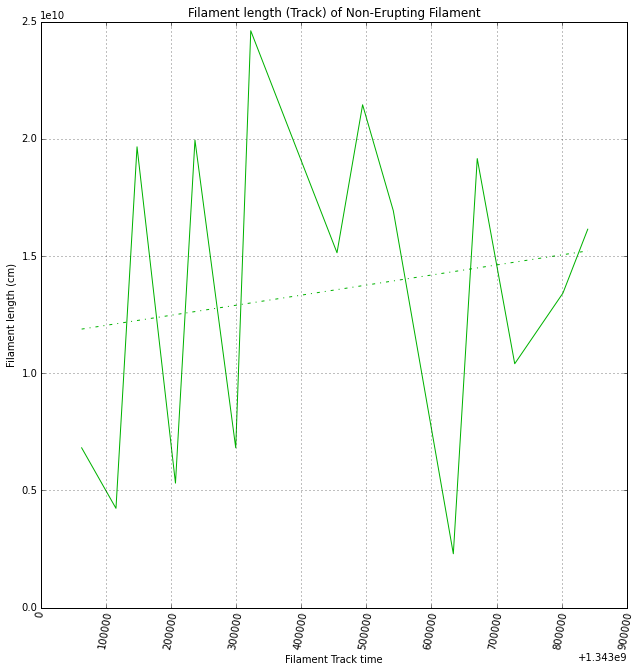

-3105.59460643


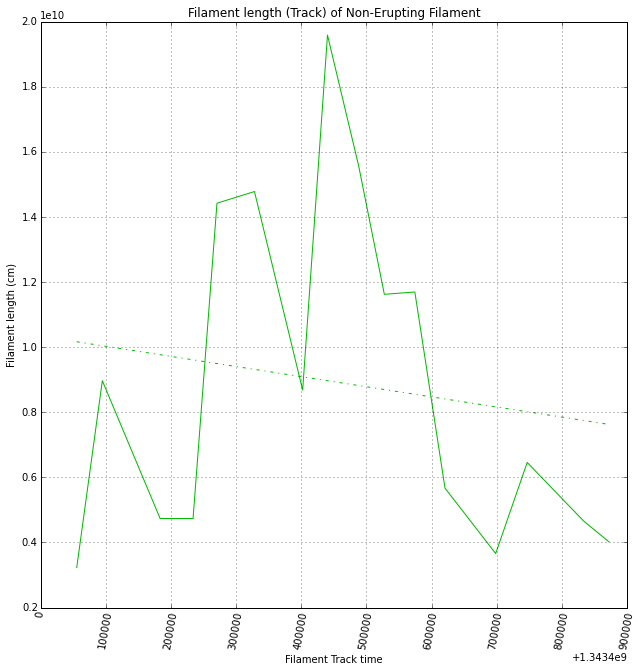

-7082.43974808


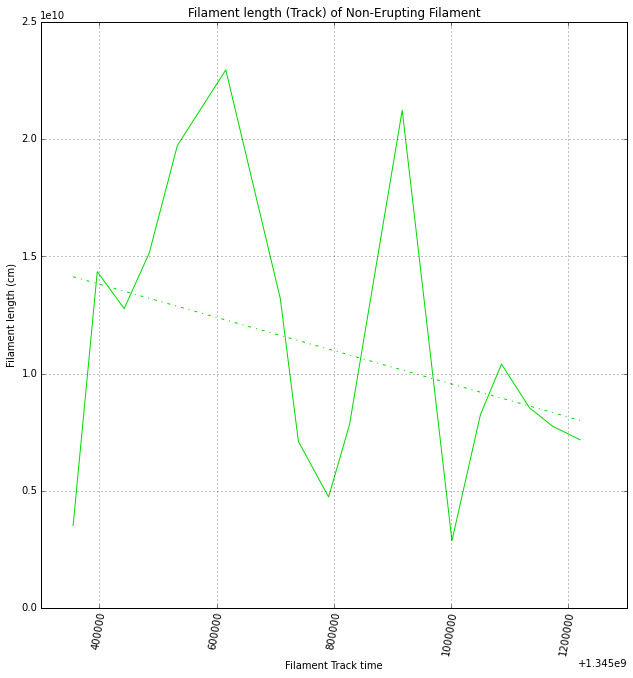

1831.82605344


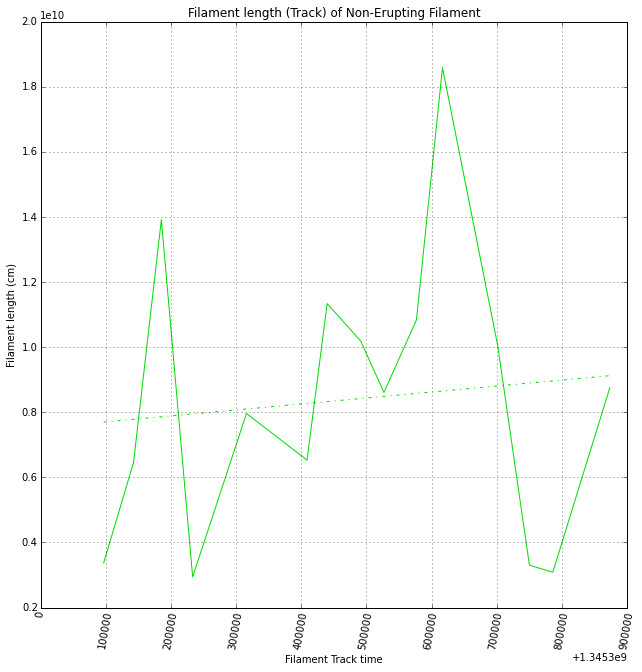

6979.96179281


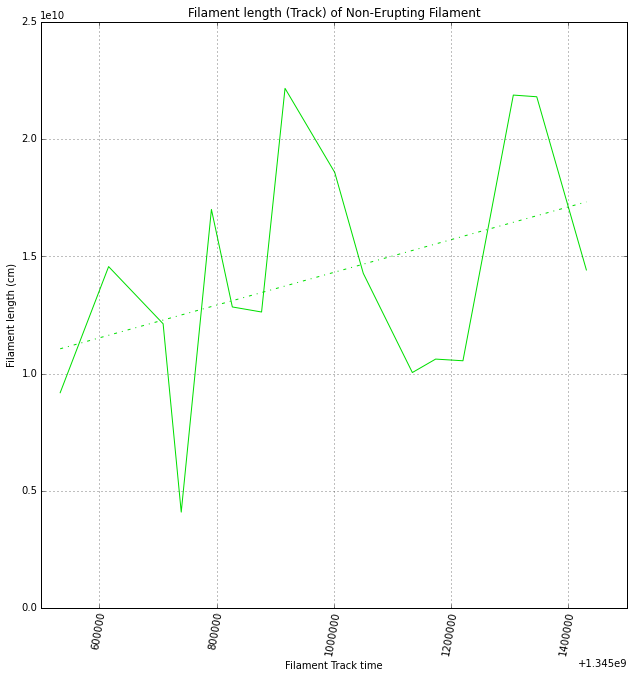

14291.9105064


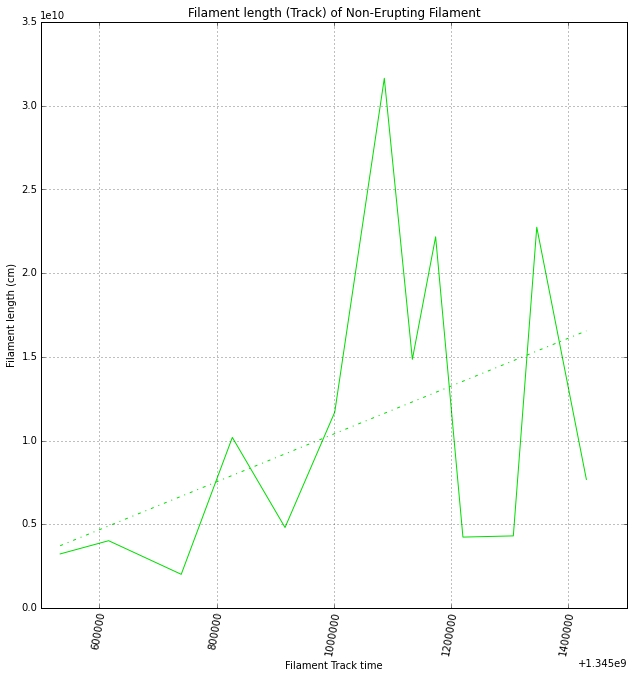

-1784.86539351


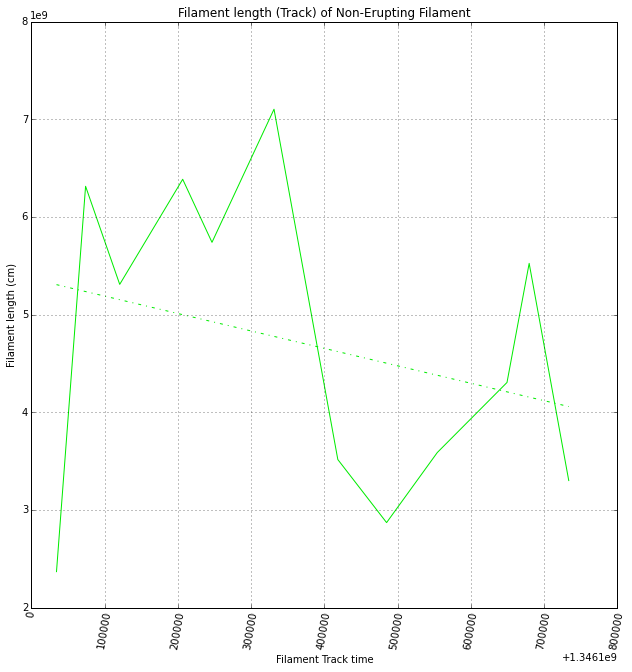

3917.63261131


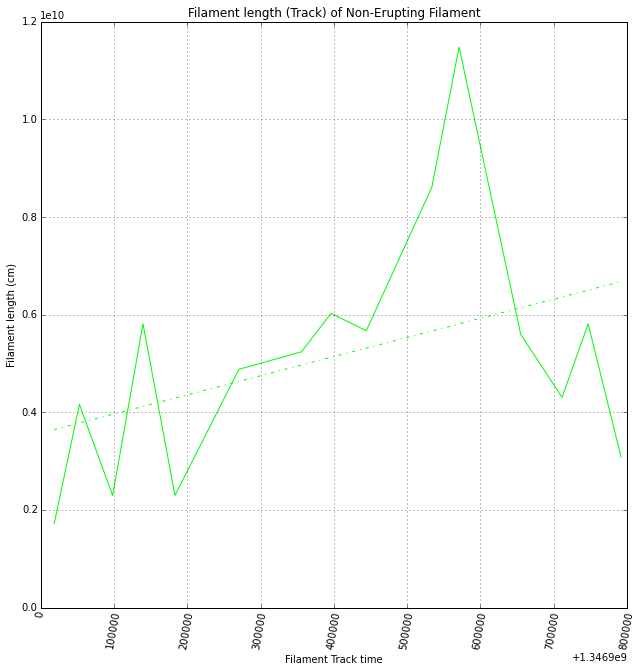

533.376414799


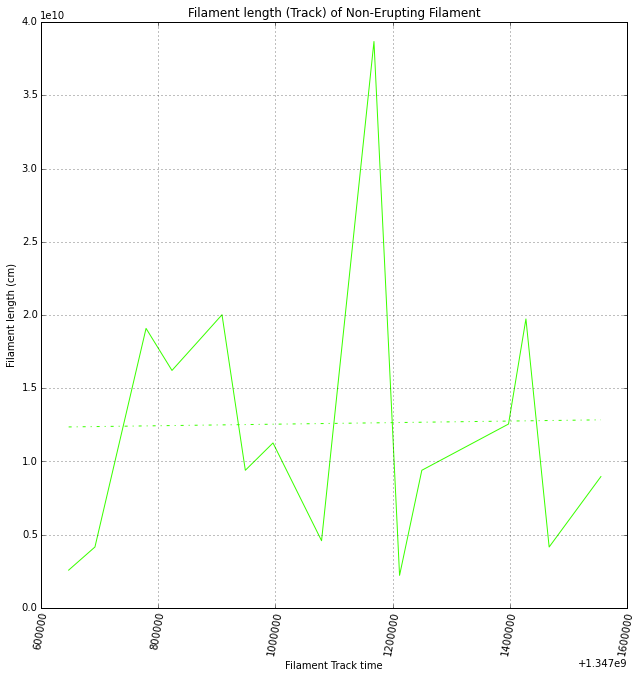

3836.7923901


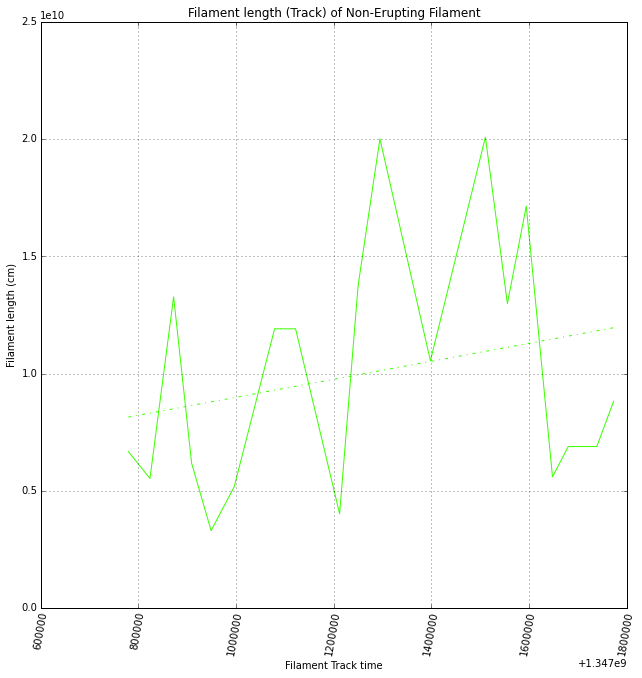

7887.86574272


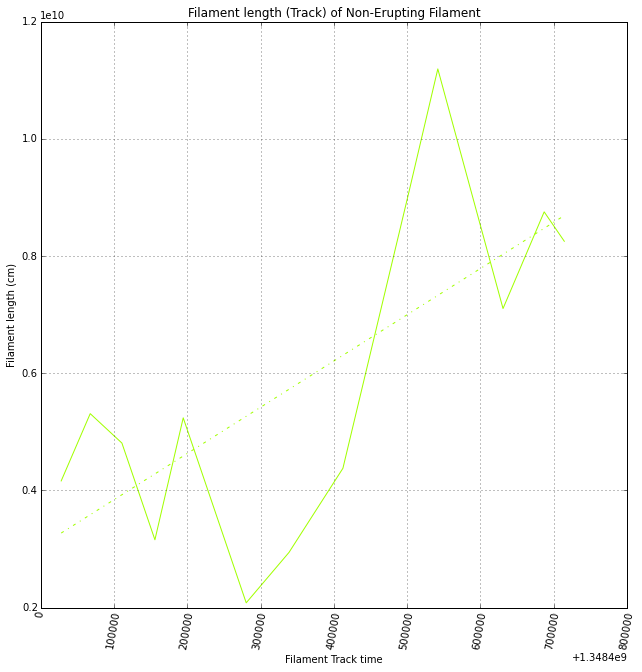

5952.93824564


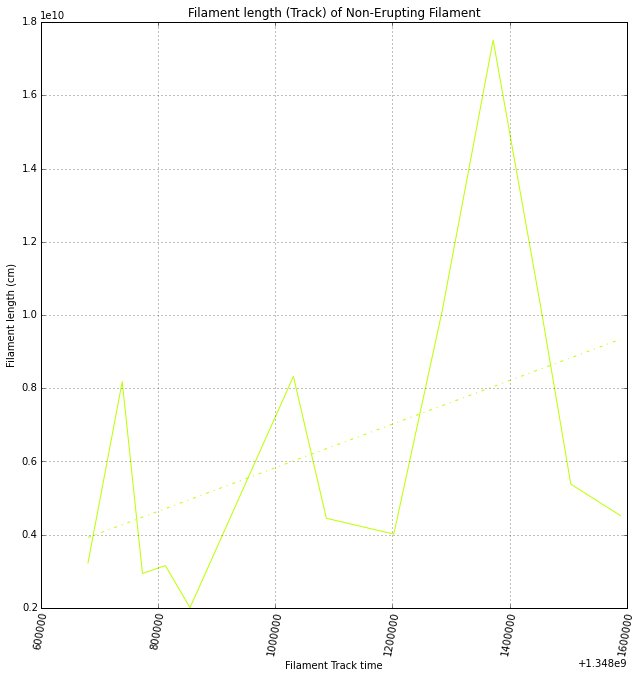

14480.7895601


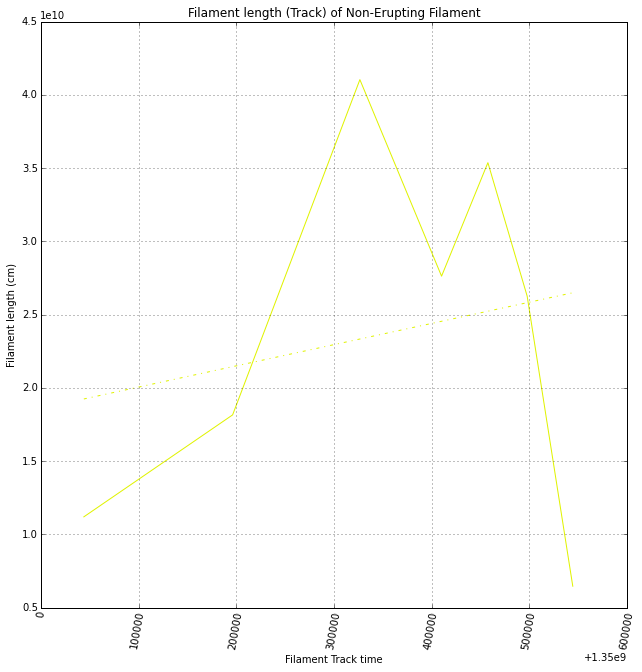

678.065027263


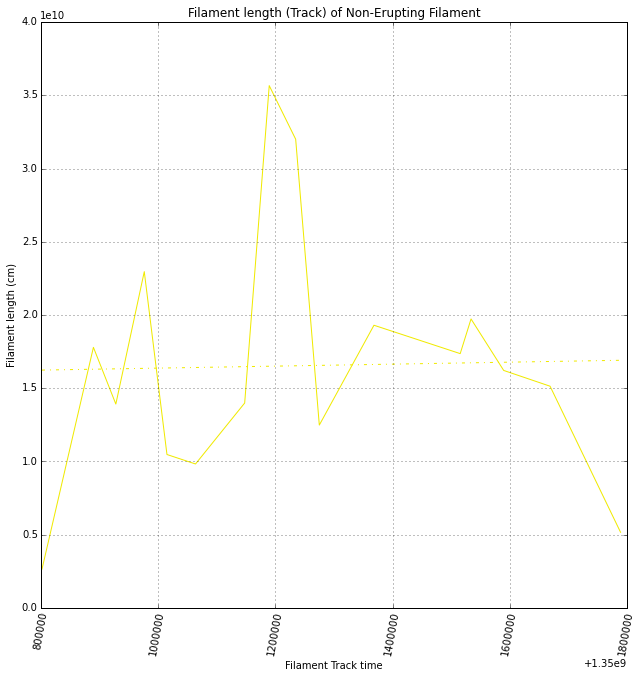

14848.1934187


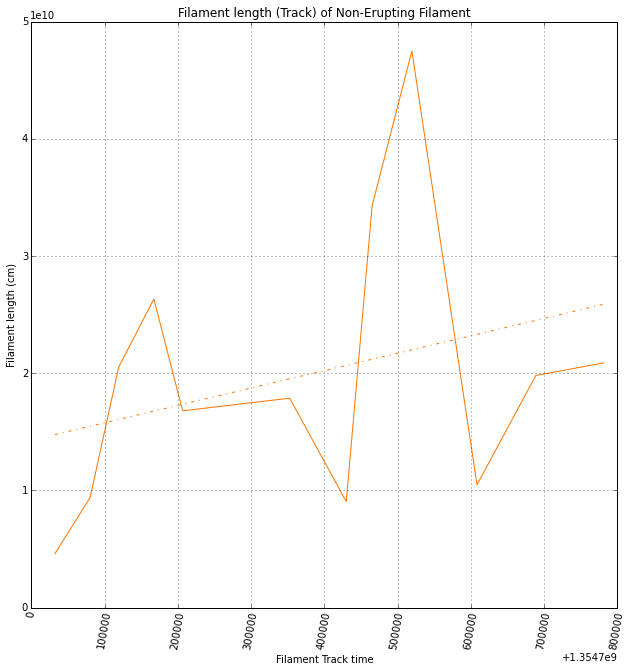

-3384.29182539


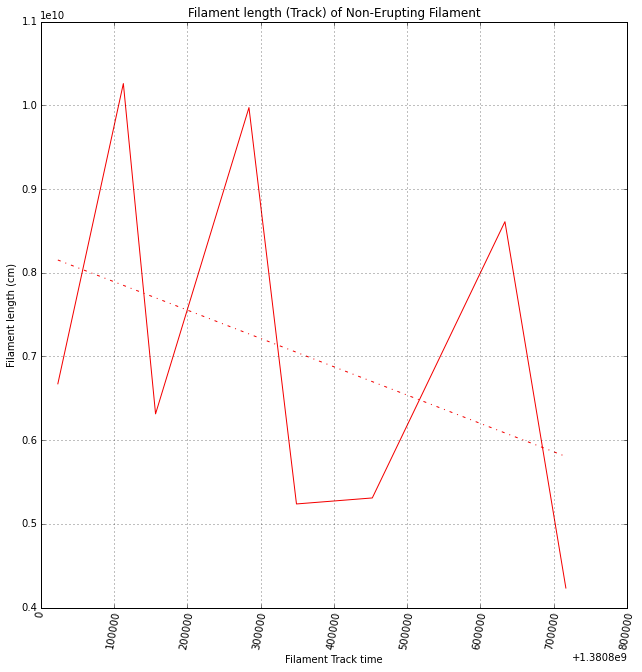

3005.77012318


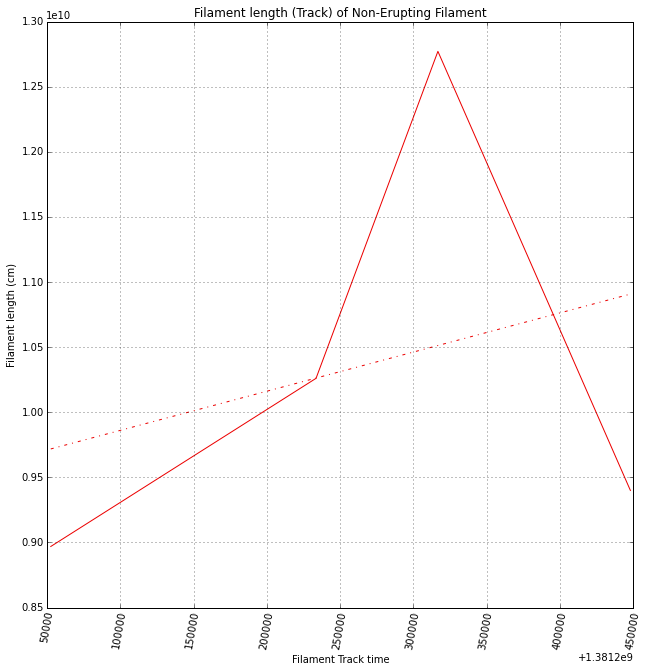

27218.7311617


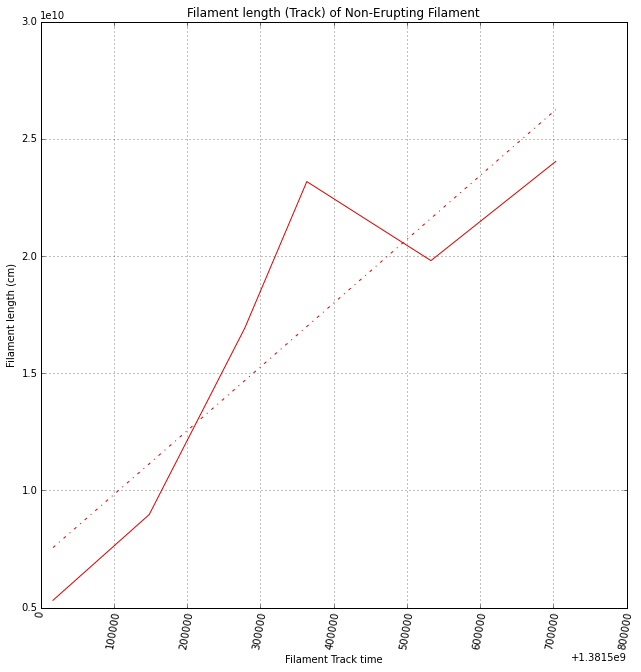

-6079.40803446


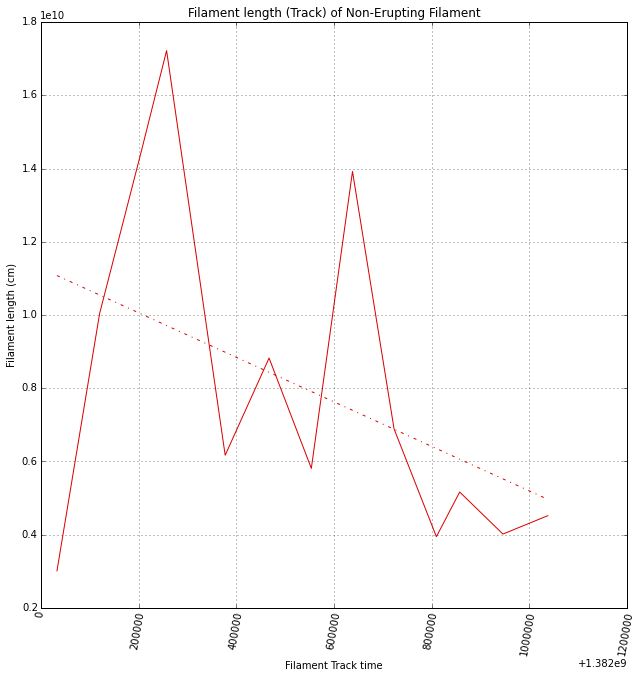

-13334.8927445


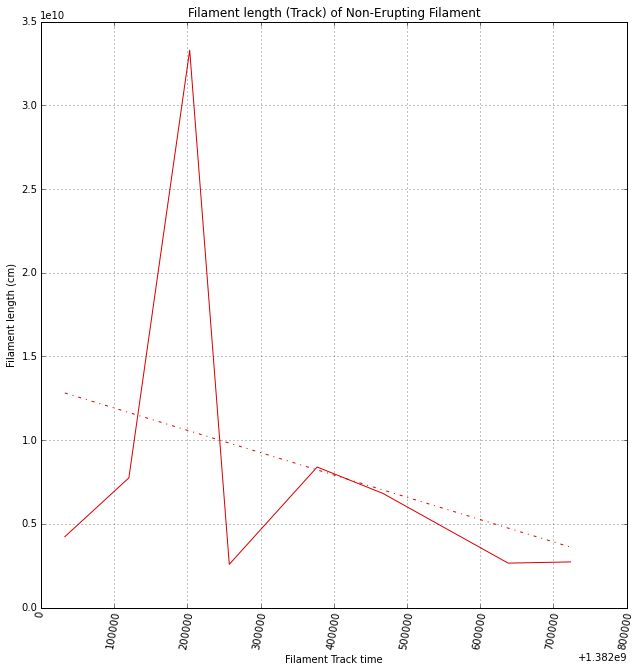

-985.137455265


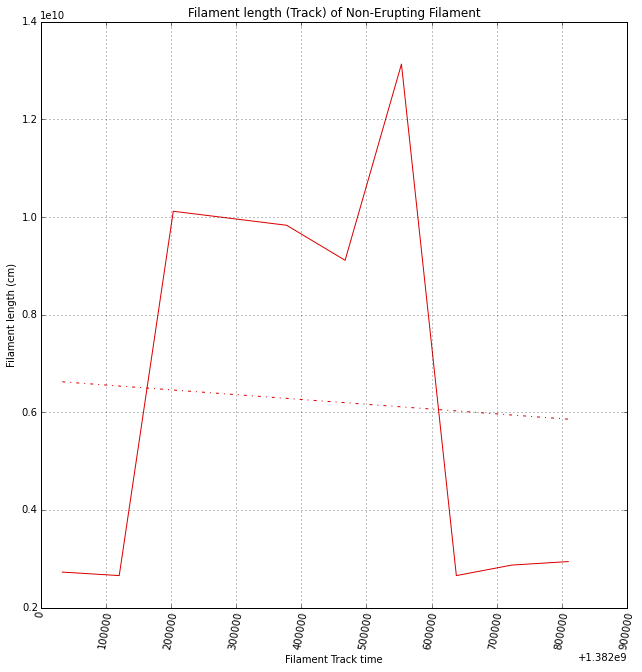

-18169.9120657


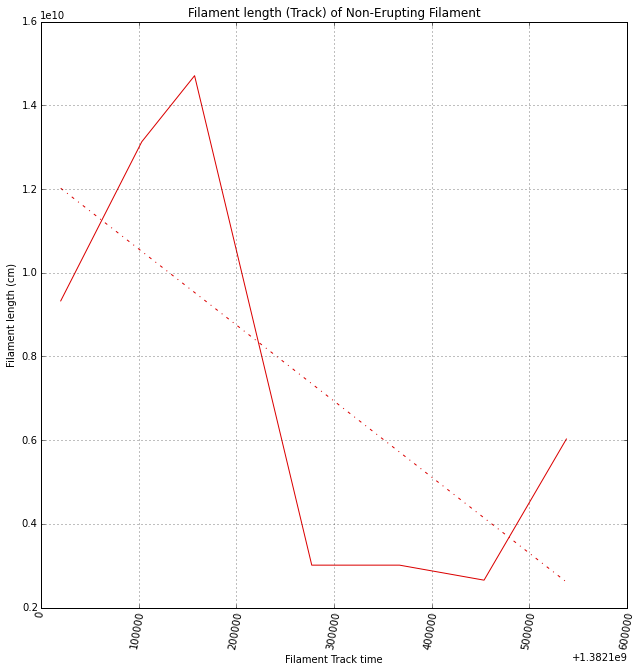

2784.40308851


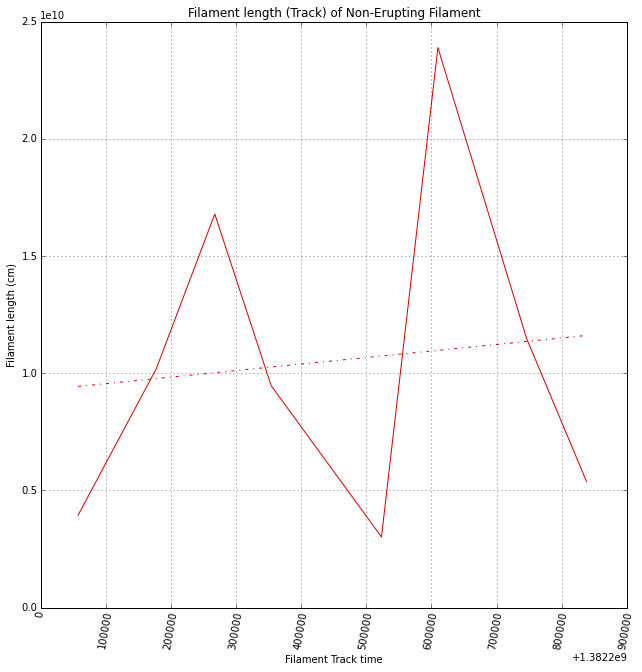

In [27]:
colorscale2=[]
norm = mpl.colors.Normalize(vmin=0, vmax=3500)
cmap = plt.get_cmap('nipy_spectral')
m = cm.ScalarMappable(norm=norm, cmap=cmap)
interest=[]
x=[]
y=[]
t=[]
tslope=[]
count_decrease=0
count_increase=0
count_nochange=0
all_tracks_trans=np.unique(all_tracks_trans)
for track in all_tracks_trans:
    scale3=m.to_rgba(track)
    x=[] ### will be time data
    y=[] ## will be length data 
    r=[]
    t=[]
    interest=[]
    tslope=[]
    for r in all_data_trans:      #iterates through the data 
        if r[0] == track:  #finds the correct track
            if r not in interest:
                 interest.append(r)   #appends the data to a new list
    for k in range(0, len(interest)):
        t1=parse(interest[k][1])  #filament time
        t.append(t1)
        y.append(interest[k][2])
        sec=(t1-datetime.datetime(1970,1,1)).total_seconds()
        tslope.append(sec)
    fit = np.polyfit(tslope, y,1)    ##fits around zero 
    slope, intercept= fit = np.polyfit(tslope, y,1)   ###gets slope
    time_fit_float = [float(int(x)) for x in tslope]  #makes the time values floats 
    line = [slope*each+intercept for each in time_fit_float] #Calculate the line points (y =mx+b)
    print slope
    if slope < 0:
        count_decrease+= 1
    if slope > 0:
        count_increase += 1
    if slope == 0:
        count_nochange +=1      
    #plt.plot(tslope, y, xdate=True,ydate=False, color=scale3, linestyle='-')
    plt.plot(tslope, y, color=scale3, linestyle='-')
    plt.plot(time_fit_float, line, '-.', color=scale3)   ##plots the line fit
    plt.title('Filament length (Track) of Non-Erupting Filament')
    plt.grid(True)
    fig1 = plt.gcf()
    fig1.set_size_inches(10.5,10.5)
    plt.xlabel('Filament Track time')
    plt.ylabel('Filament length (cm)')
    plt.xticks( rotation= 80 )
    plt.show()
length_before=[count_decrease, count_increase]

[17, 20]


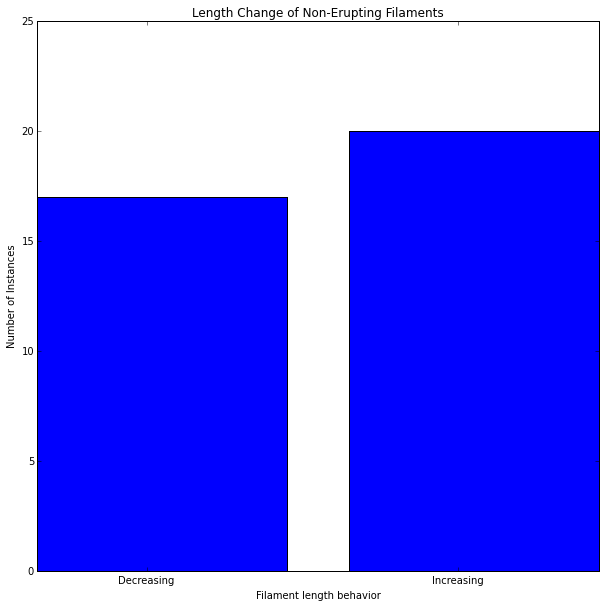

In [12]:
n_groups=2
print length_before
index = np.arange(n_groups)
bar_width = 0.35
#length_labels=['Increasing', 'Decreasing']
plt.bar(index, length_before)
plt.xlabel('Filament length behavior')
plt.ylabel('Number of Instances')
plt.title('Length Change of Non-Erupting Filaments')
plt.xticks(index + bar_width, ('Decreasing', 'Increasing'))
plt.ylim(0, 25)
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.tight_layout()
plt.show()

# Chirality analysis first average, then changing

In [29]:
colorscale2=[]
norm = mpl.colors.Normalize(vmin=0, vmax=3500)
cmap = plt.get_cmap('nipy_spectral')
m = cm.ScalarMappable(norm=norm, cmap=cmap)
interest=[]
x=[]
y=[]
t=[]
chiral_data=[]
all_tracks_trans=np.unique(all_tracks_trans)
for track in all_tracks_trans:
    #print track
    scale3=m.to_rgba(track)
    x=[] ### will be time data
    y=[] ## will be length data 
    r=[]
    t=[]
    interest=[]
    for r in all_data_trans:      #iterates through the data 
        if r[0] == track:  #finds the correct track
            if r not in interest:
                 interest.append(r)   #appends the data to a new list
    for k in range(0, len(interest)):
        t1=parse(interest[k][1])    #filament time
        t.append(t1)
        y.append(interest[k][3])
    avg_chiral = sum(y)/float(len(y))
    if track in all_north_trans:
        position = 'N'
    if track in all_south_trans:
        position = 'S'
    #plt.plot_date(t, y, xdate=True,ydate=False, color=scale3, linestyle='-')
    #plt.title('Filament Chirality Per Track versus eruption time')
    #plt.grid(True)
    #plt.ylim(-1.5, 1.5)
    #fig1 = plt.gcf()
    #fig1.set_size_inches(10.5,10.5)
    #plt.xlabel('Filament Track time')
    #plt.xticks( rotation= 80 )
    #plt.ylabel('Filament Chirality')
    #plt.show()
    chiral_data.append((track, position, avg_chiral))

In [30]:
##the following kernel splits up all the chirality data into different sets based on average value/location for bar plots
positive_north =[]
zero_north = []
negative_north = []
positive_south =[]
zero_south = []
negative_south = []
for item in chiral_data:   ####has track number, average value, location ('N' or 'S')
    if item[1] == 'N':
        if item[2] < 0:
            negative_north.append(item[2])   ### if average chirality is less than zero (North)
        if item[2] == 0:
            zero_north.append(item[2])
        if item[2] > 0:
            positive_north.append(item[2])
    if item[1] == 'S':
        if item[2] < 0:
            negative_south.append(item[2])
        if item[2] == 0:
            zero_south.append(item[2])
        if item[2] > 0:
            positive_south.append(item[2])
#count_chiral_north = [len(positive_north), len(zero_north), len(negative_north)]  #finds the number of each value
#count_chiral_south = [len(positive_south), len(zero_south), len(negative_south)]


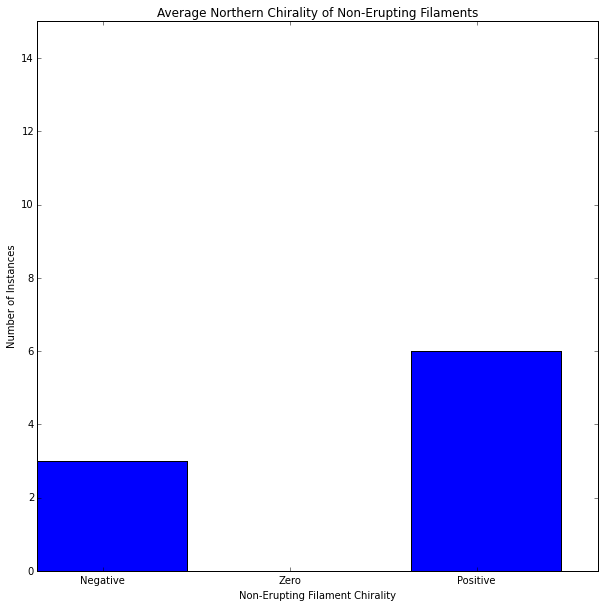

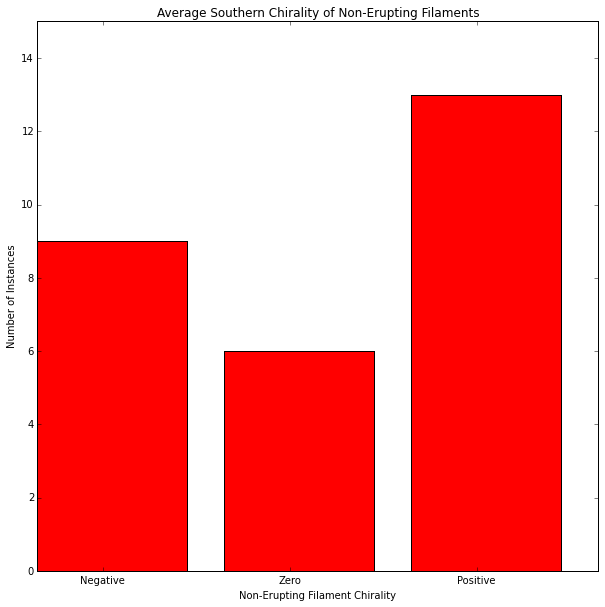

In [31]:
#bar plots, chirality north
count_chiral_north = [len(negative_north), len(zero_north), len(positive_north)]
n_groups=3
index = np.arange(n_groups)
bar_width = 0.35
plt.bar(index, count_chiral_north)
plt.xlabel('Non-Erupting Filament Chirality ')
plt.ylabel('Number of Instances')
plt.title('Average Northern Chirality of Non-Erupting Filaments')
plt.xticks(index + bar_width, ('Negative', 'Zero', 'Positive'))
plt.ylim(0, 15)
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.tight_layout()
plt.show()

count_chiral_south = [len(negative_south), len(zero_south), len(positive_south)]
n_groups=3
index = np.arange(n_groups)
bar_width = 0.35
plt.bar(index, count_chiral_south, color='r')
plt.xlabel('Non-Erupting Filament Chirality ')
plt.ylabel('Number of Instances')
plt.title('Average Southern Chirality of Non-Erupting Filaments')
plt.xticks(index + bar_width, ('Negative', 'Zero', 'Positive'))
plt.ylim(0, 15)
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.tight_layout()
plt.show()

-2.77767273936e-07


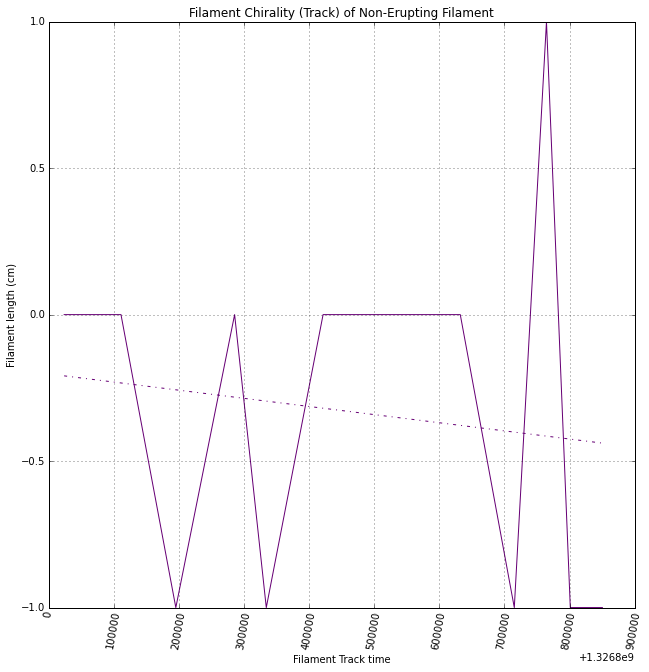

-3.04167213064e-07


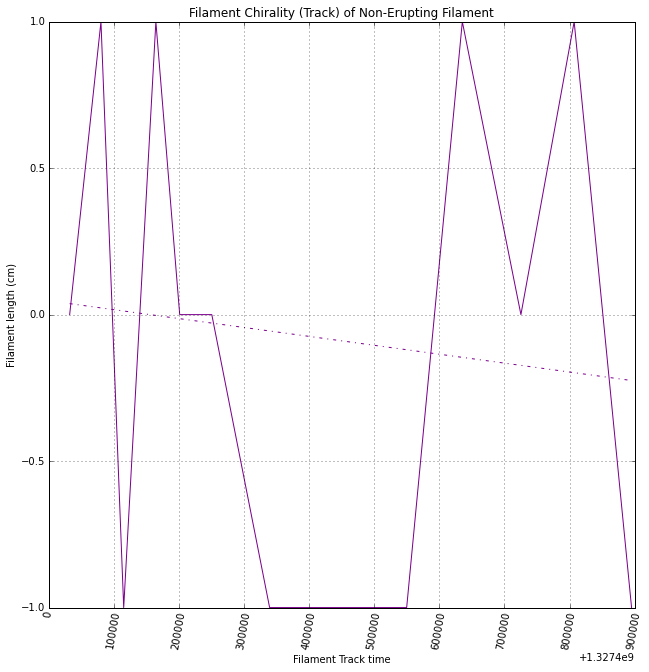

-4.26902158439e-07


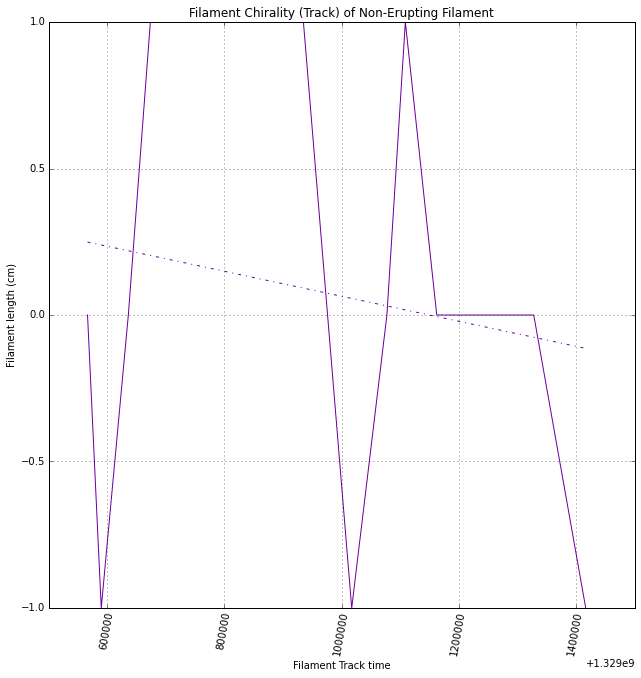

-2.13813204855e-07


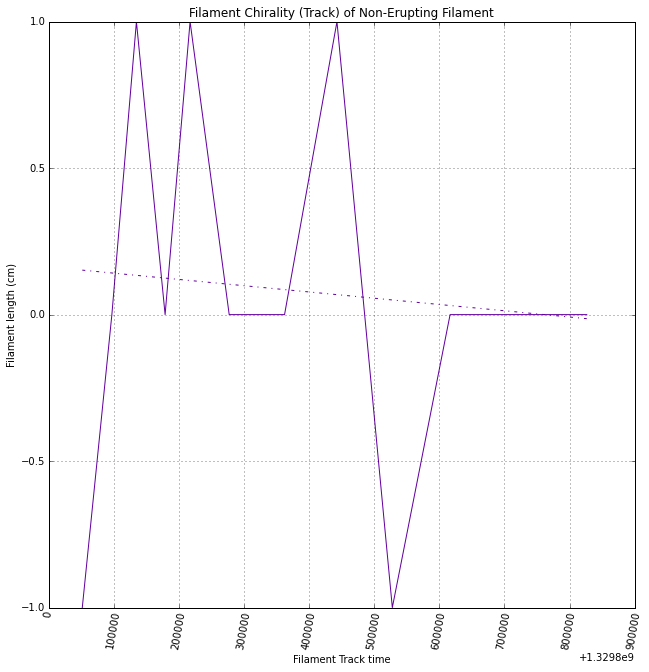

7.47689134342e-07


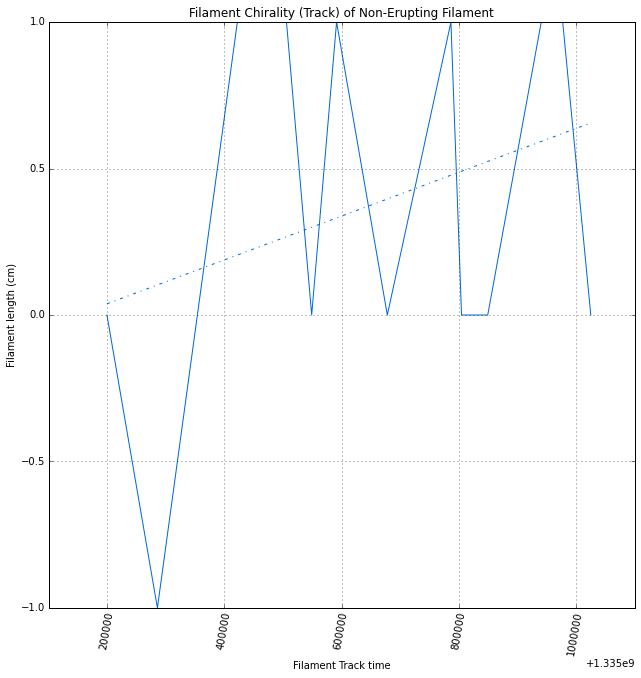

3.84707676917e-07


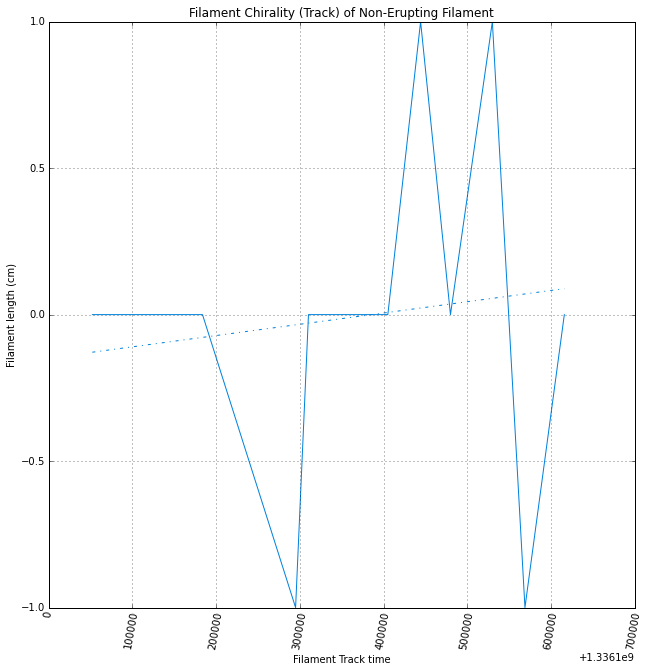

-3.67690557419e-07


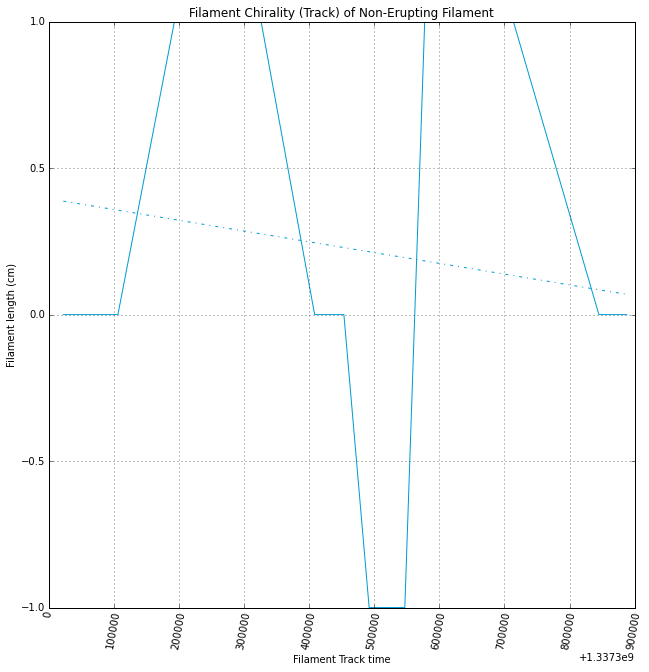

3.05170182495e-07


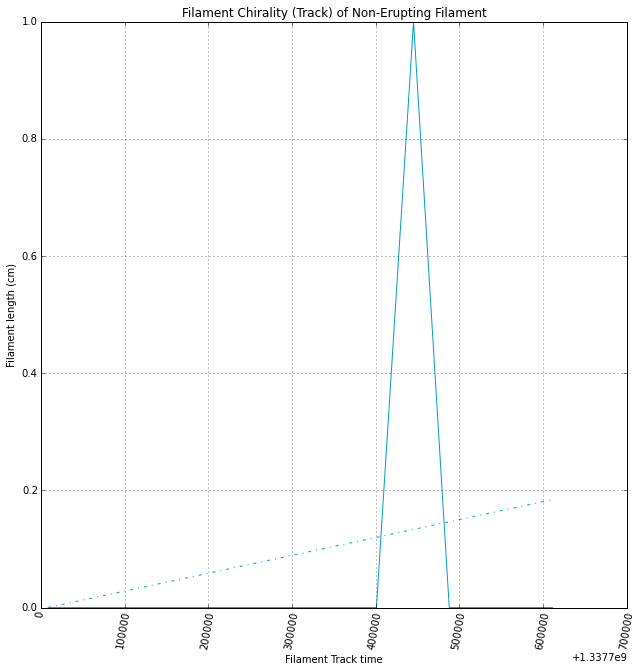

4.98218786414e-07


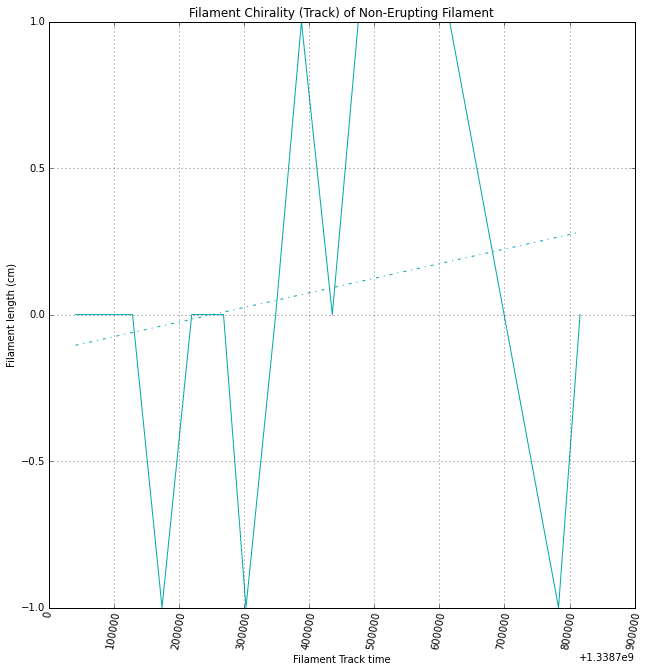

-6.05906875272e-07


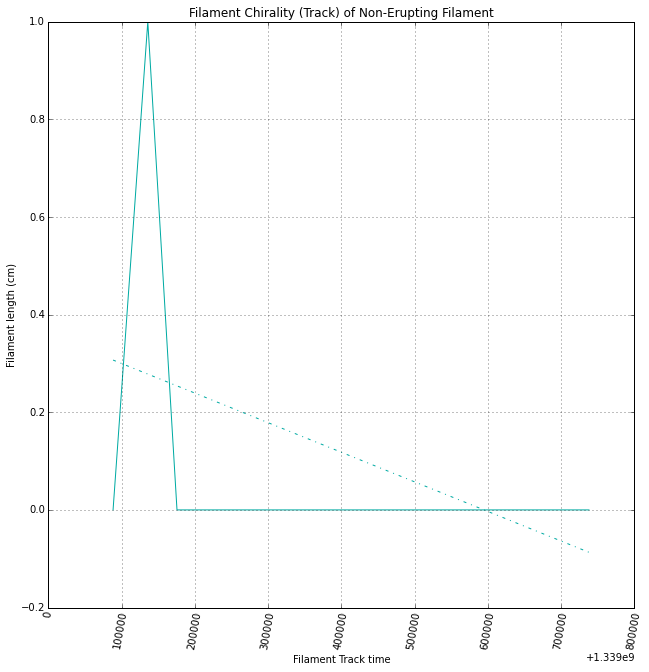

1.09331539133e-06


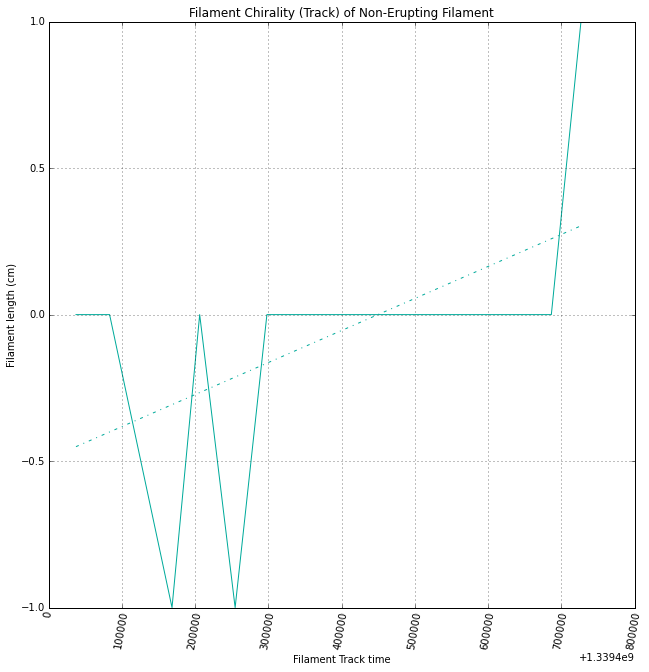

1.21755176462e-06


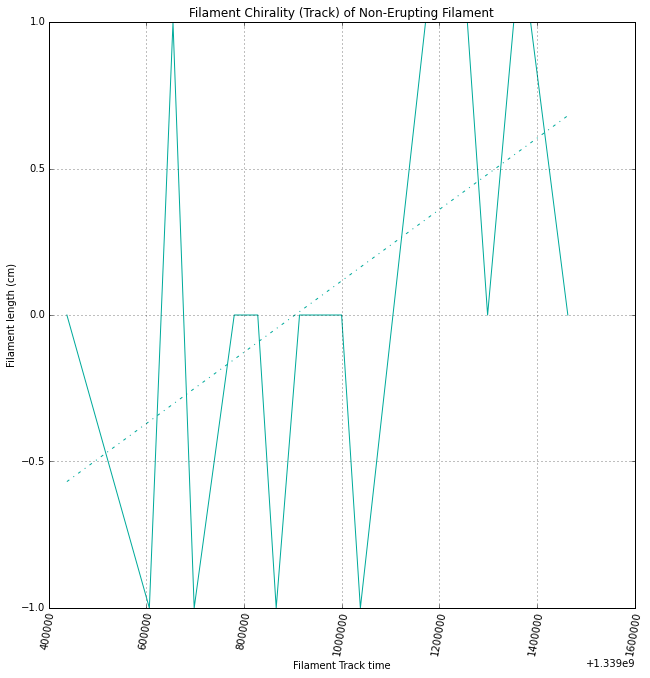

-2.0239279292e-08


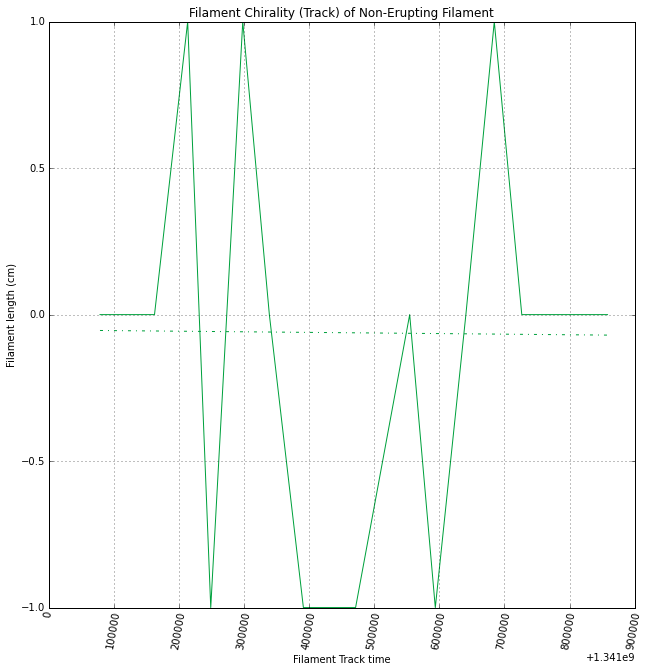

1.78204636763e-08


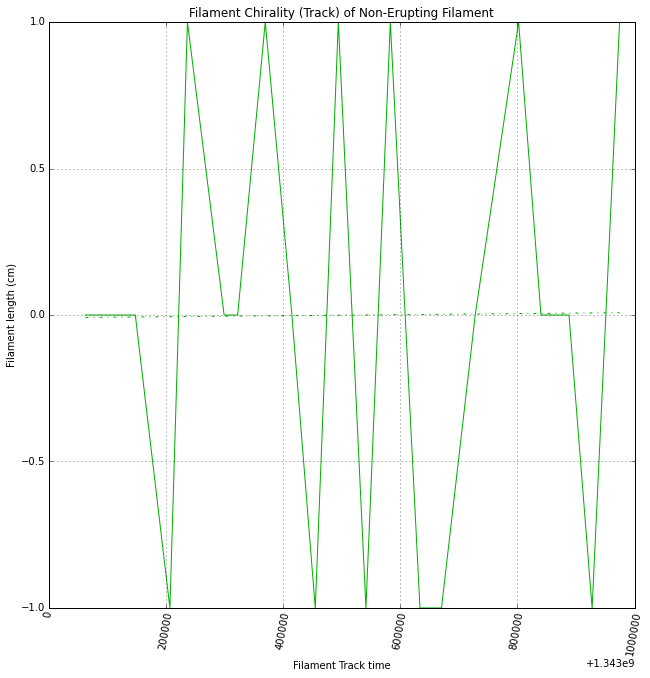

9.72346232788e-07


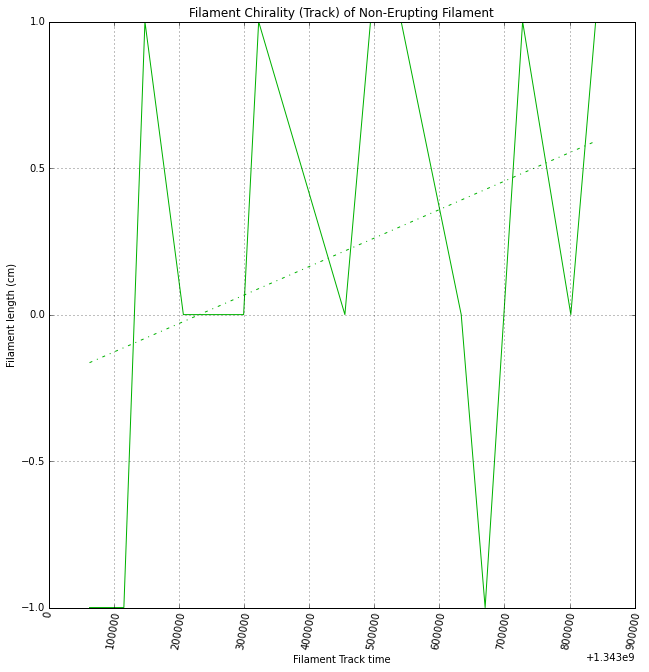

6.86081968458e-08


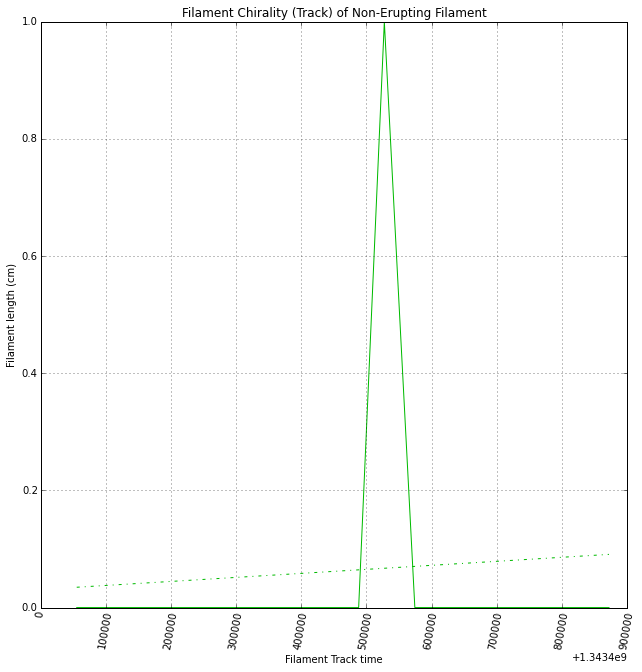

-5.0163699908e-07


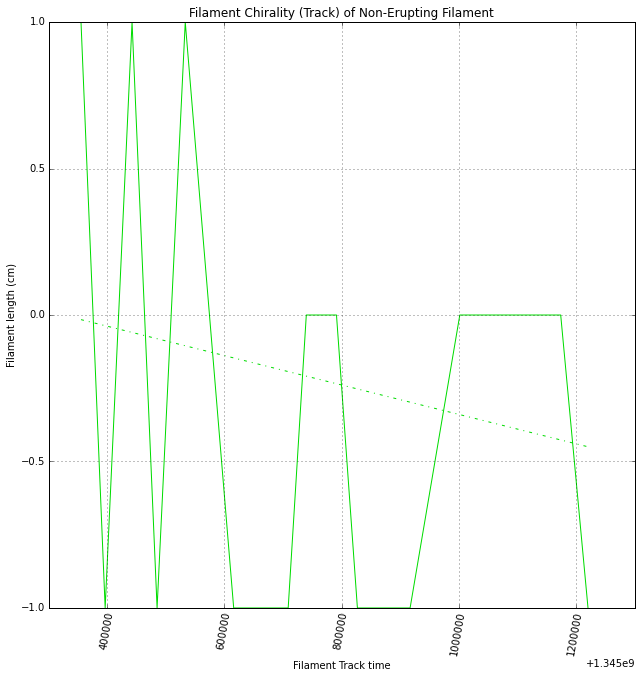

-7.8433677539e-08


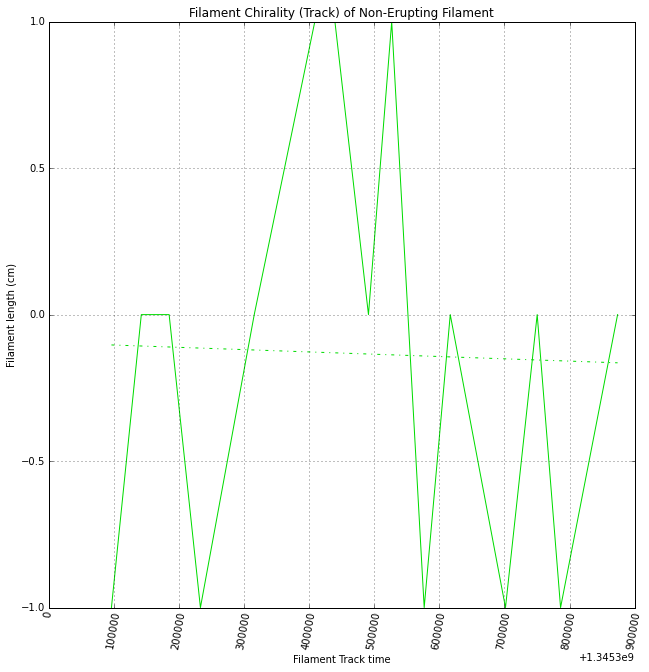

1.21476469801e-06


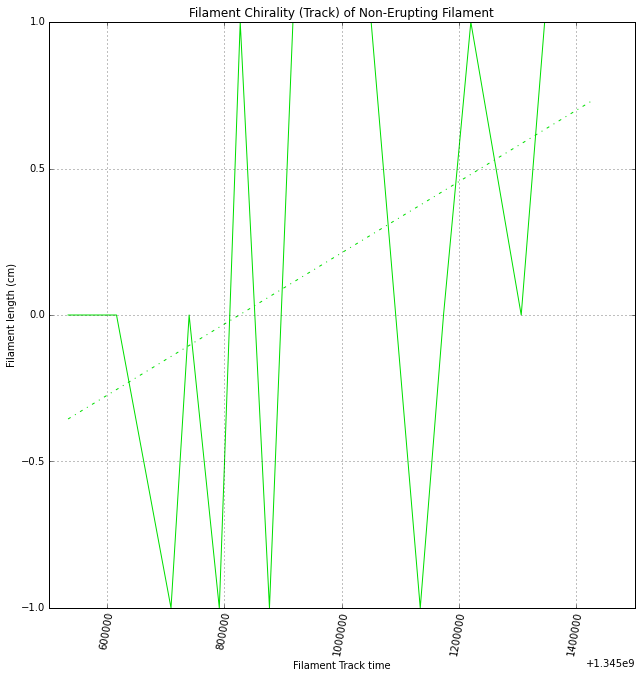

-1.13313958092e-06


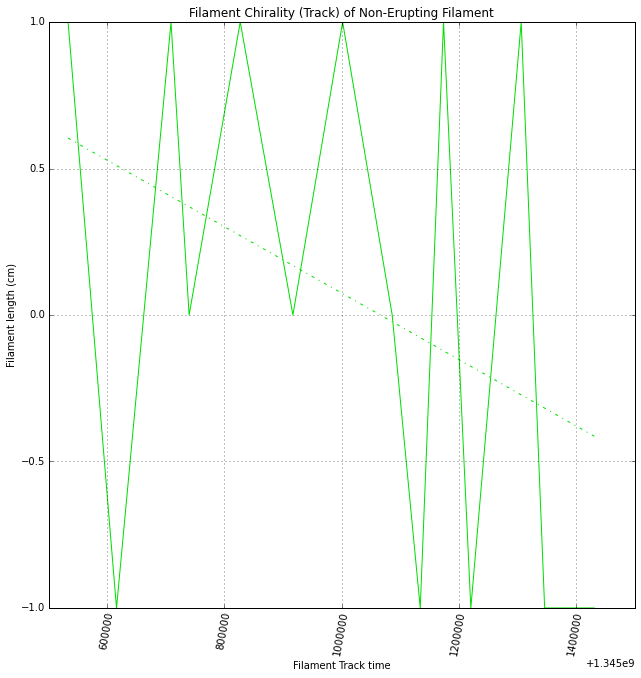

5.20912784857e-08


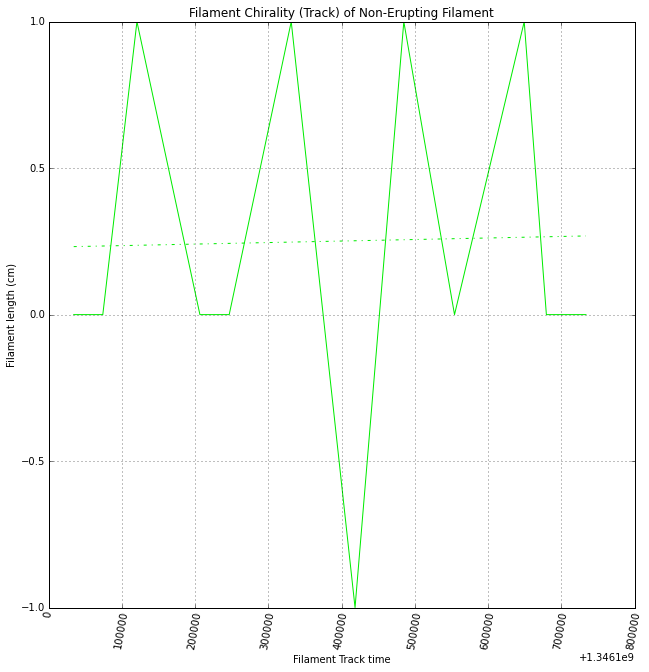

-1.14954187097e-06


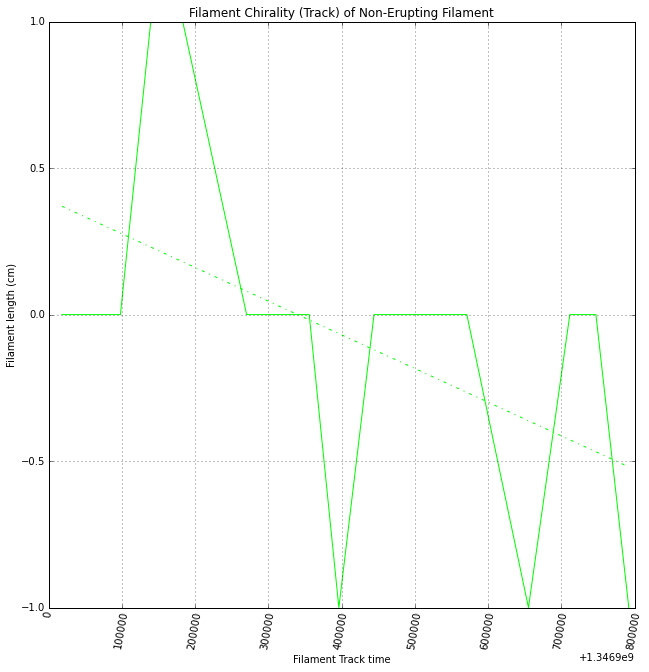

-6.11596658325e-09


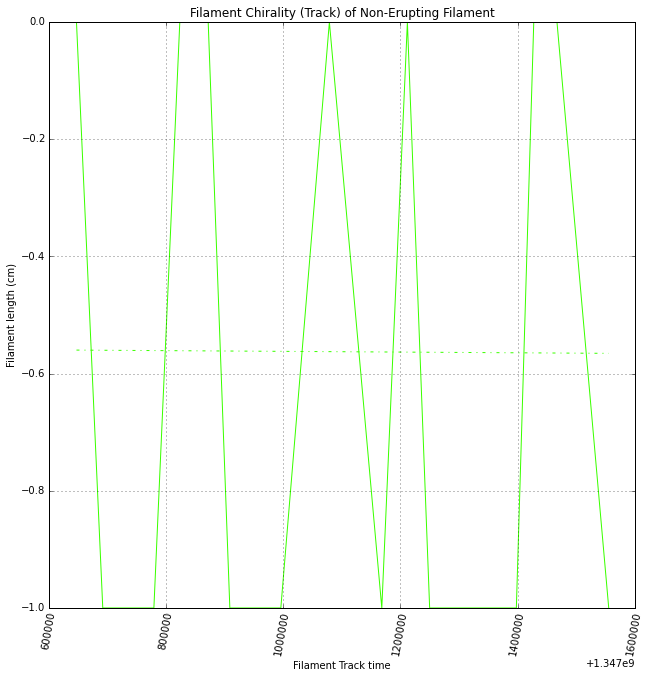

-1.80892827682e-07


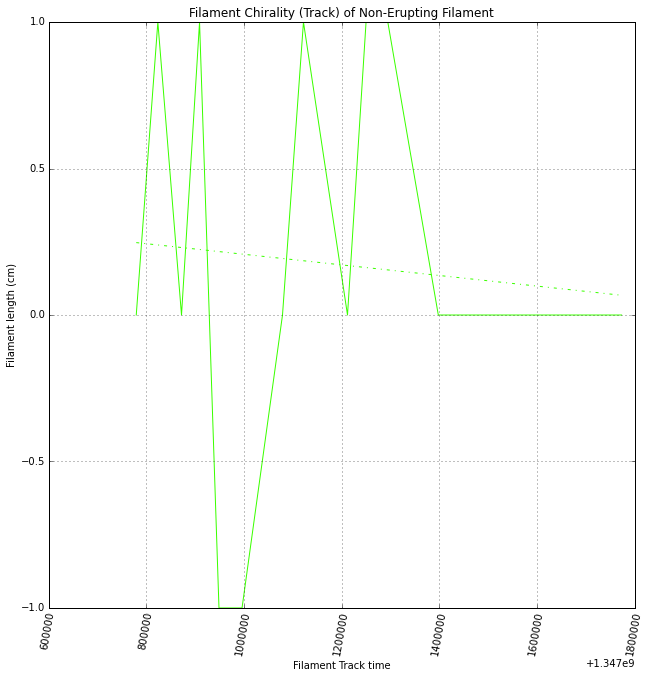

1.40360443553e-07


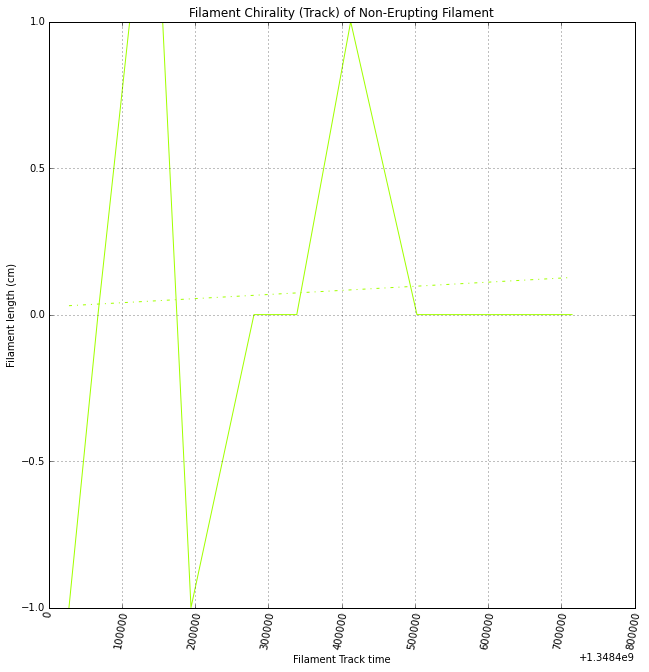

-2.67168588213e-07


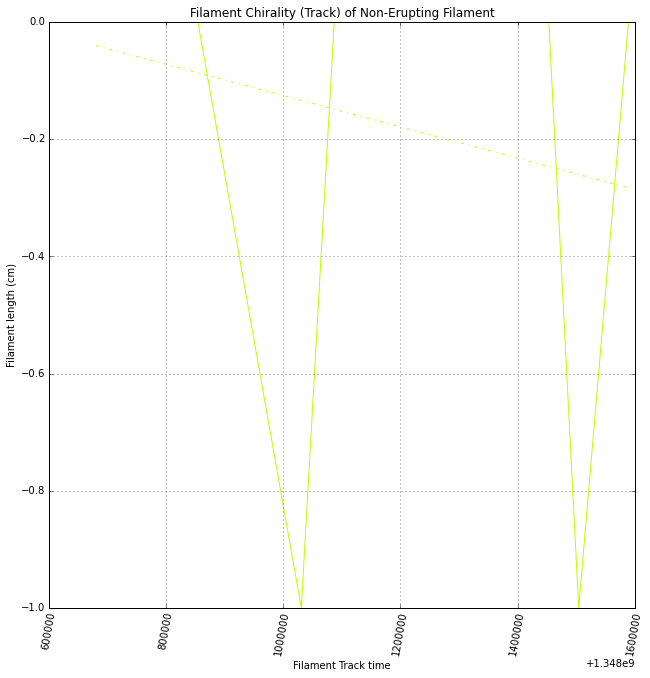

1.57805081951e-06


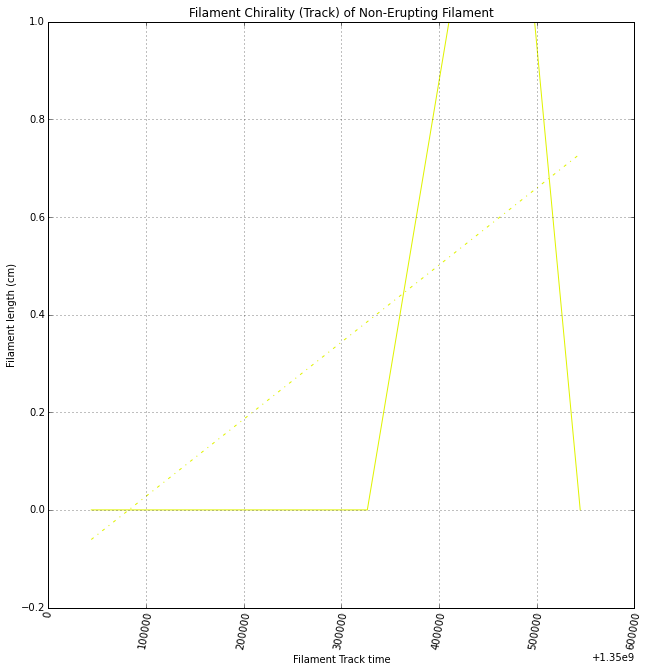

3.87310519174e-07


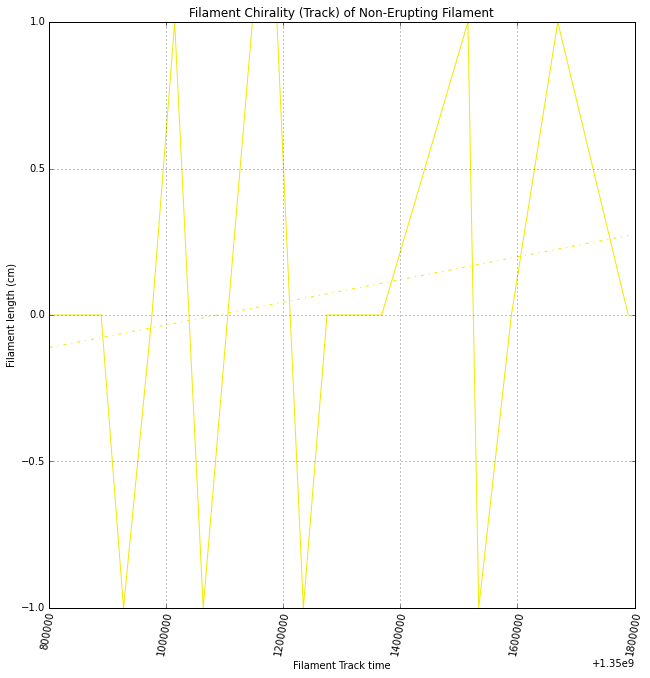

7.64254594957e-07


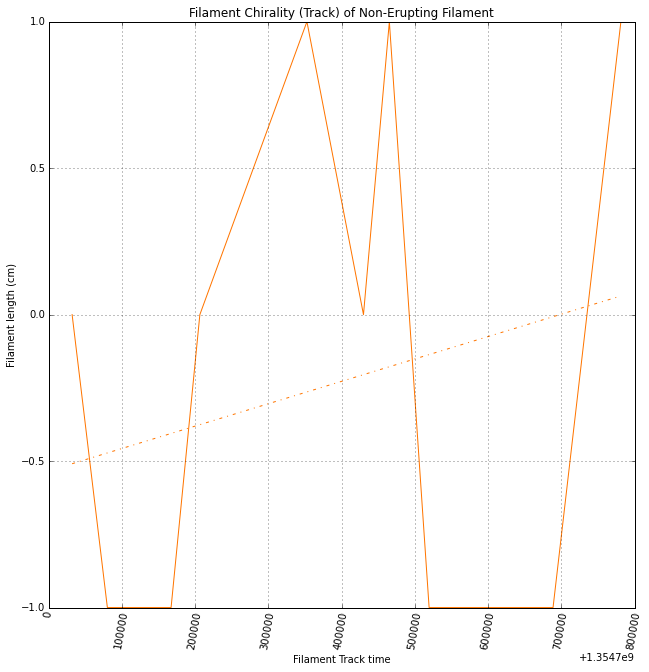

-1.34468417472e-06


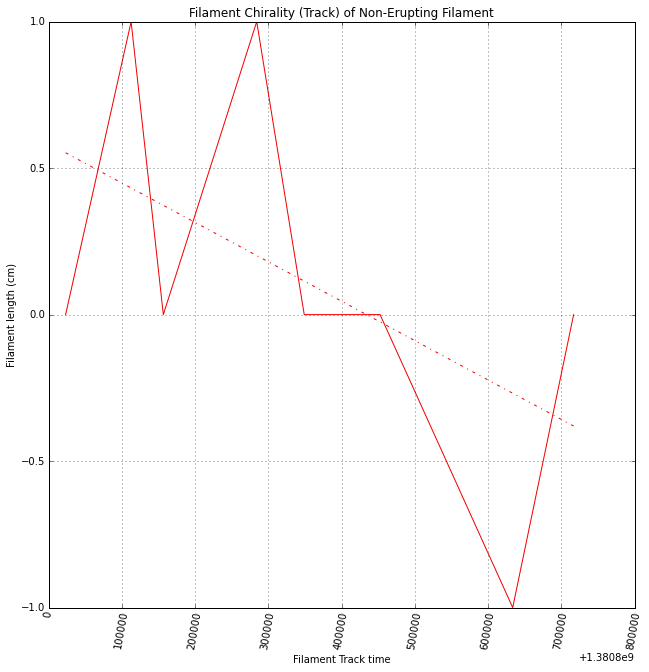

-2.6052785159e-06


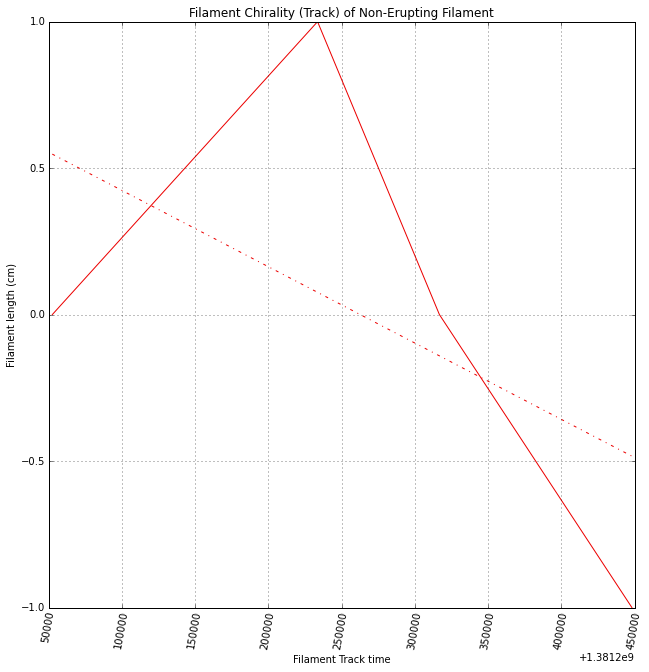

-6.62566885466e-07


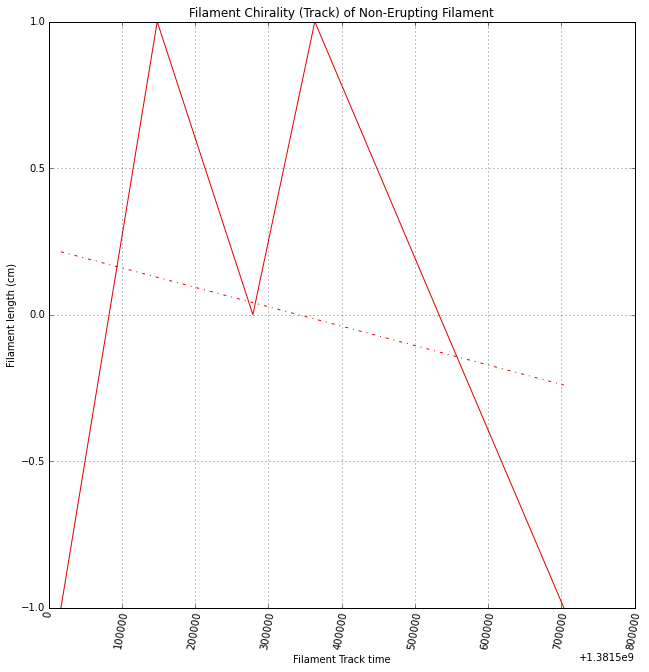

-3.70637926802e-07


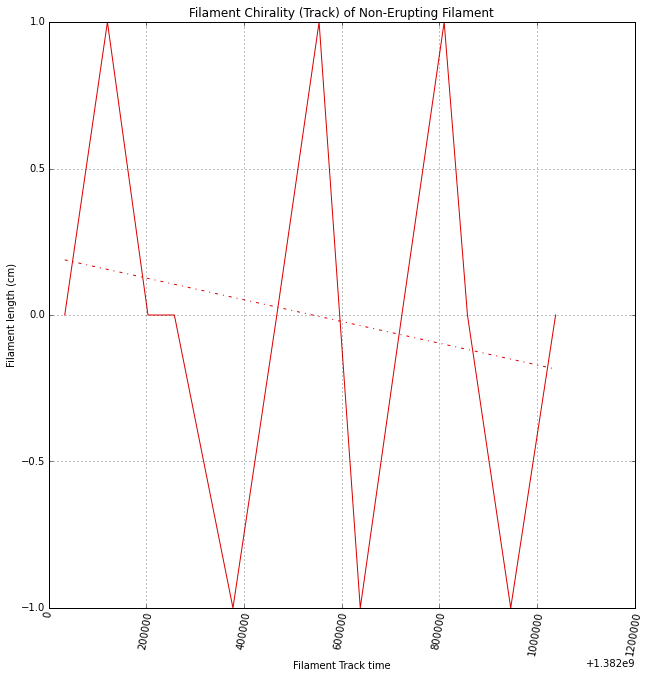

1.64386444114e-06


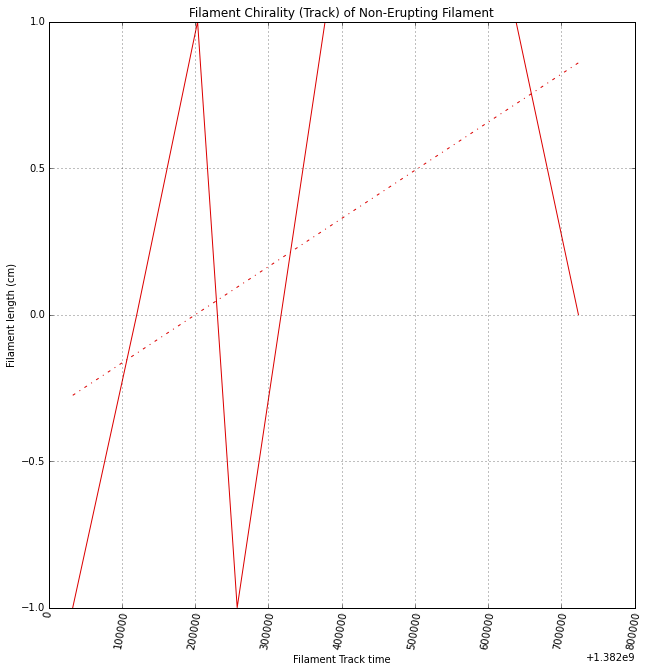

6.74699321977e-07


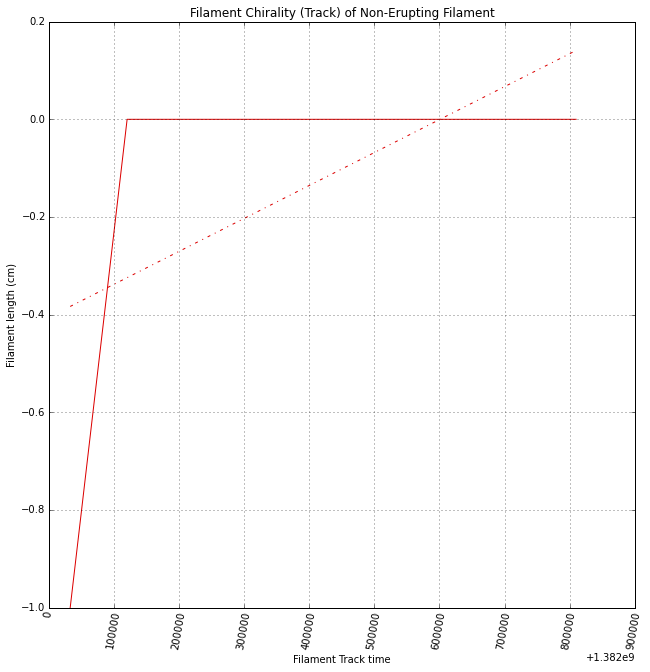

-7.84118086463e-07


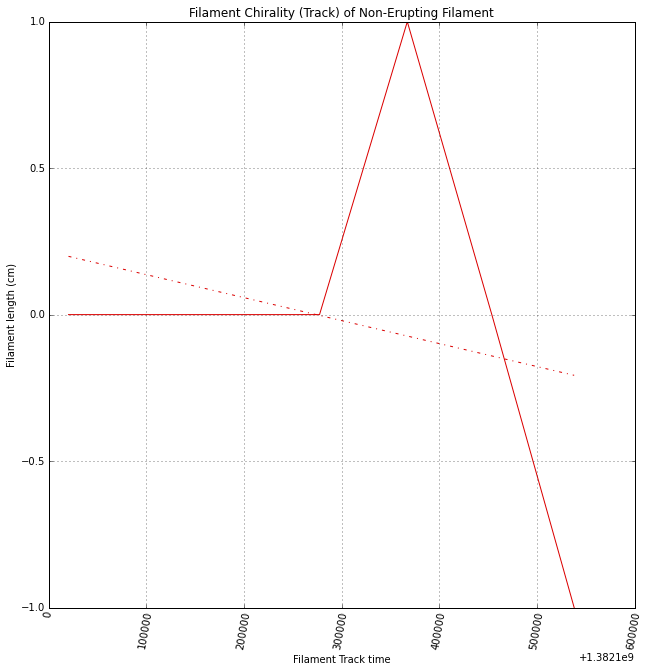

-5.01654365368e-08


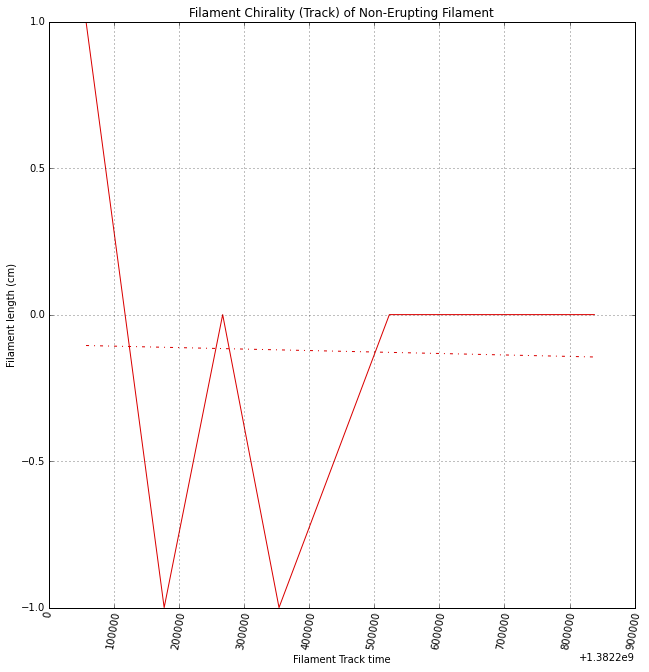

In [32]:
####to find the slopes before eruption
colorscale2=[]
norm = mpl.colors.Normalize(vmin=0, vmax=3500)
cmap = plt.get_cmap('nipy_spectral')
m = cm.ScalarMappable(norm=norm, cmap=cmap)
interest=[]
x=[]
y=[]
t=[]
tslope=[]
count_decrease=0
count_increase=0
count_nochange=0
all_tracks_trans=np.unique(all_tracks_trans)
for track in all_tracks_trans:
    scale3=m.to_rgba(track)
    x=[] ### will be time data
    y=[] ## will be length data 
    r=[]
    t=[]
    interest=[]
    tslope=[]
    for r in all_data_trans:      #iterates through the data 
        if r[0] == track:  #finds the correct track
            if r not in interest:
                 interest.append(r)   #appends the data to a new list
    for k in range(0, len(interest)):
        t1=parse(interest[k][1])  #filament time
        t.append(t1)
        y.append(interest[k][3])
        sec=(t1-datetime.datetime(1970,1,1)).total_seconds()
        tslope.append(sec)
    fit = np.polyfit(tslope, y,1)    ##fits around zero 
    slope, intercept= fit = np.polyfit(tslope, y,1)   ###gets slope
    time_fit_float = [float(int(x)) for x in tslope]  #makes the time values floats 
    line = [slope*each+intercept for each in time_fit_float] #Calculate the line points (y =mx+b)
    print slope
    if slope < 0:
        count_decrease+= 1
    if slope > 0:
        count_increase += 1
    if slope == 0:
        count_nochange +=1
    plt.plot(tslope, y, color=scale3, linestyle='-')
    plt.plot(time_fit_float, line, '-.', color=scale3)   ##plots the line fit
    #plt.plot_date(t, y, xdate=True,ydate=False, color=scale3, linestyle='-')
    plt.title('Filament Chirality (Track) of Non-Erupting Filament')
    plt.grid(True)
    fig1 = plt.gcf()
    fig1.set_size_inches(10.5,10.5)
    plt.xlabel('Filament Track time')
    plt.ylabel('Filament length (cm)')
    plt.xticks( rotation= 80 )
    plt.show()
chirality_before=[count_decrease, count_nochange, count_increase]

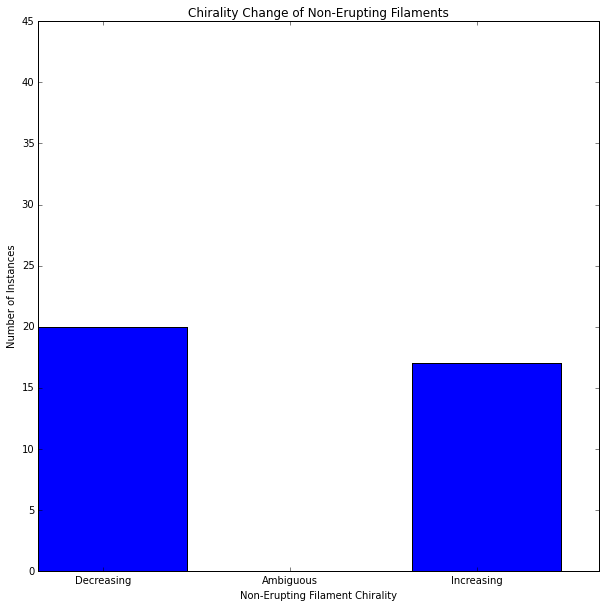

In [17]:
#bar plots, chirality changing? 
n_groups=3
index = np.arange(n_groups)
bar_width = 0.35
length_labels=['Decreasing', 'Ambiguous', 'Increasing']
plt.bar(index, chirality_before)
plt.xlabel('Non-Erupting Filament Chirality ')
plt.ylabel('Number of Instances')
plt.title('Chirality Change of Non-Erupting Filaments')
plt.xticks(index + bar_width, ('Decreasing', 'Ambiguous', 'Increasing'))
plt.ylim(0, 45)
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.tight_layout()
plt.show()

# Tilt Analysis (average, then changing)

In [34]:
colorscale2=[]
norm = mpl.colors.Normalize(vmin=0, vmax=3500)
cmap = plt.get_cmap('nipy_spectral')
m = cm.ScalarMappable(norm=norm, cmap=cmap)
interest=[]
x=[]
y=[]
t=[]
tilt_data=[]
all_tracks_trans=np.unique(all_tracks_trans)
for track in all_tracks_trans:
    #print track
    scale3=m.to_rgba(track)
    x=[] ### will be time data
    y=[] ## will be length data 
    r=[]
    t=[]
    interest=[]
    emp=[]
    for r in all_data_trans:      #iterates through the data 
        if r[0] == track:  #finds the correct track
            if r not in interest:
                 interest.append(r)   #appends the data to a new list
    for k in range(0, len(interest)):
        t1=parse(interest[k][1])    #filament time
        t.append(t1)
        y.append(interest[k][4])
    avg_tilt = sum(y)/float(len(y))
    if track in all_north_trans:
        position = 'N'
    if track in all_south_trans:
        position = 'S'
    #plt.plot_date(t, y, xdate=True,ydate=False, color=scale3, linestyle='-')
    #plt.title('Filament Chirality Per Track versus eruption time')
    #plt.grid(True)
    #plt.ylim(-90, 90)
    #fig1 = plt.gcf()
    #fig1.set_size_inches(10.5,10.5)
    #plt.xlabel('Filament Track time')
    #plt.xticks( rotation= 80 )
    #plt.ylabel('Filament Tilt')
    #plt.show()
    tilt_data.append((track, position, avg_tilt))

In [35]:
##the following kernel splits up all the tilt data into different sets based on average value/location for bar plots
positive_north_tilt =[]
zero_north_tilt = []
negative_north_tilt = []
positive_south_tilt =[]
zero_south_tilt = []
negative_south_tilt= []
for item in tilt_data:
    if item[1] == '':
        pass
    else:
        if item[1] == 'N':
            if item[2] < 0:
                negative_north_tilt.append(item[2])
            if item[2] == 0:
                zero_north_tilt.append(item[2])
            if item[2] > 0:
                positive_north_tilt.append(item[2])
        if item[1] == 'S':
            if item[2] < 0:
                negative_south_tilt.append(item[2])
            if item[2] == 0:
                zero_south_tilt.append(item[2])
            if item[2] > 0:
                positive_south_tilt.append(item[2])

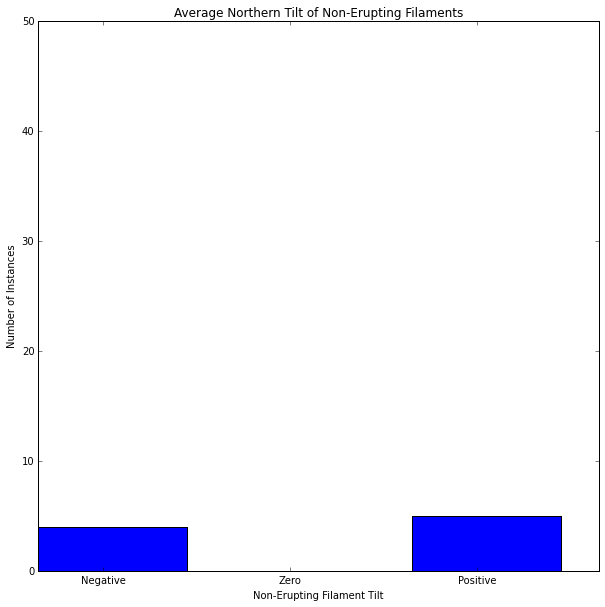

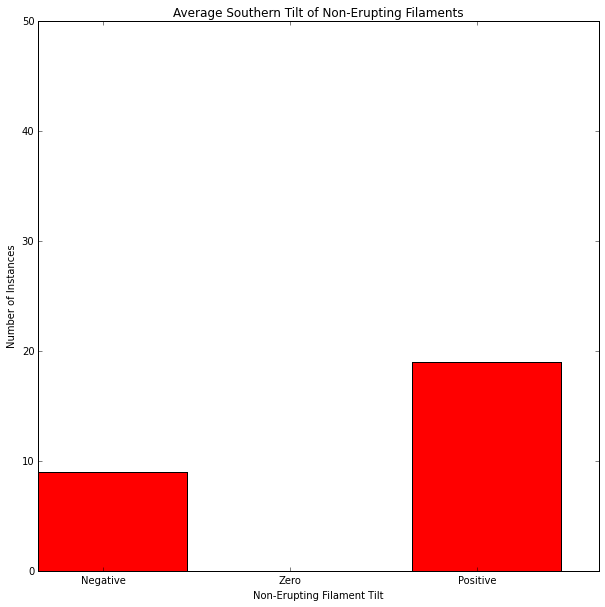

In [20]:
count_north_tilt = [len(negative_north_tilt), len(zero_north_tilt), len(positive_north_tilt)]
n_groups=3
index = np.arange(n_groups)
bar_width = 0.35
#length_labels=['Positive', 'Zero', 'Negative']
plt.bar(index, count_north_tilt)
plt.xlabel('Non-Erupting Filament Tilt ')
plt.ylabel('Number of Instances')
plt.title('Average Northern Tilt of Non-Erupting Filaments')
plt.xticks(index + bar_width, ('Negative', 'Zero', 'Positive'))
plt.ylim(0, 50)
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.tight_layout()
plt.show()

count_south_tilt = [len(negative_south_tilt), len(zero_south_tilt), len(positive_south_tilt)]
n_groups=3
index = np.arange(n_groups)
bar_width = 0.35
#length_labels=['Negative', 'Zero', 'Positive']
plt.bar(index, count_south_tilt, color='r')
plt.xlabel('Non-Erupting Filament Tilt ')
plt.ylabel('Number of Instances')
plt.title('Average Southern Tilt of Non-Erupting Filaments')
plt.xticks(index + bar_width, ('Negative', 'Zero', 'Positive'))
plt.ylim(0, 50)
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.tight_layout()
plt.show()

1.17807542452e-05


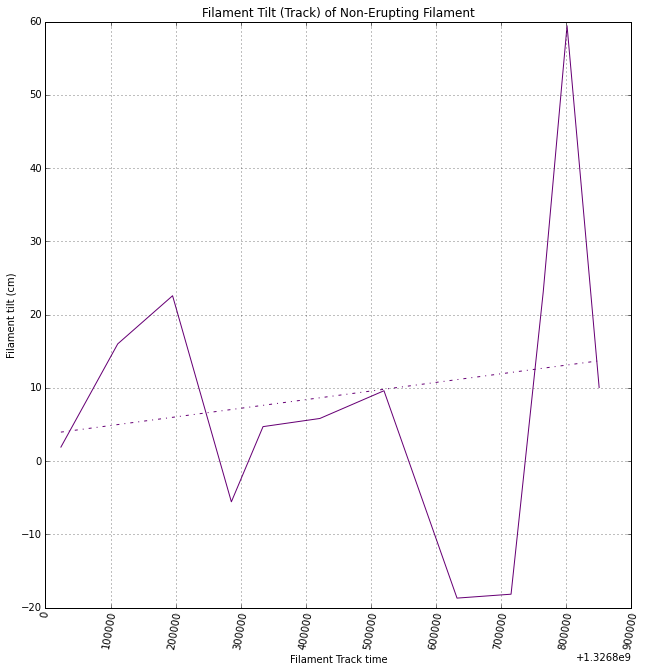

7.70558369305e-05


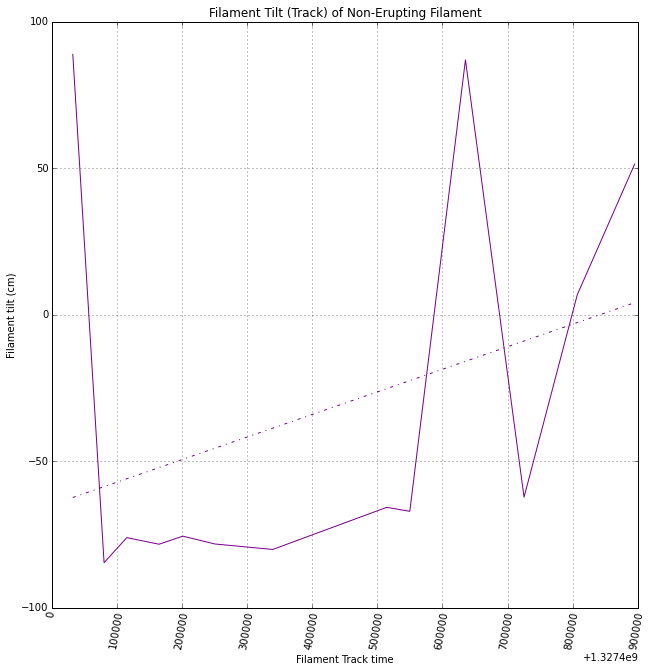

-0.000102847244391


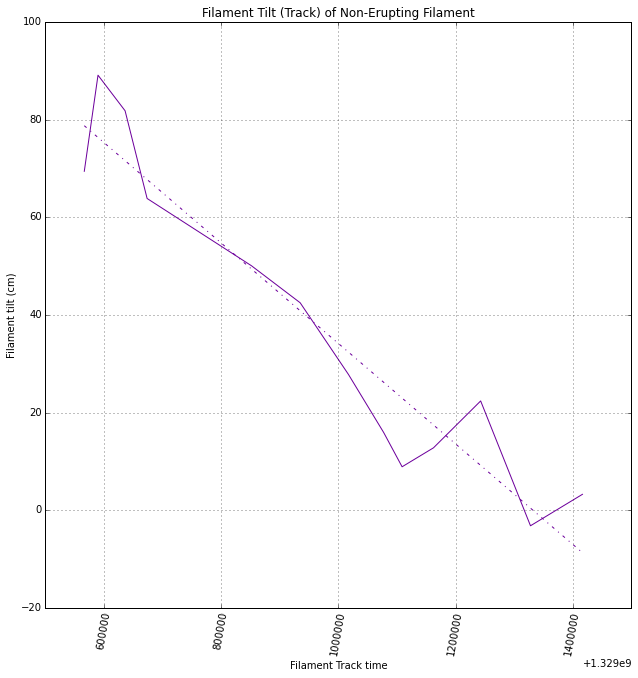

0.000199452934503


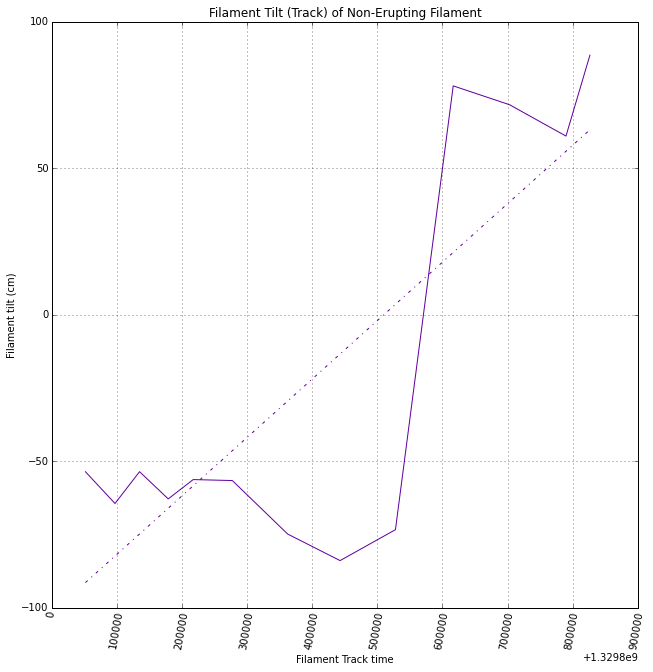

5.64262620798e-05


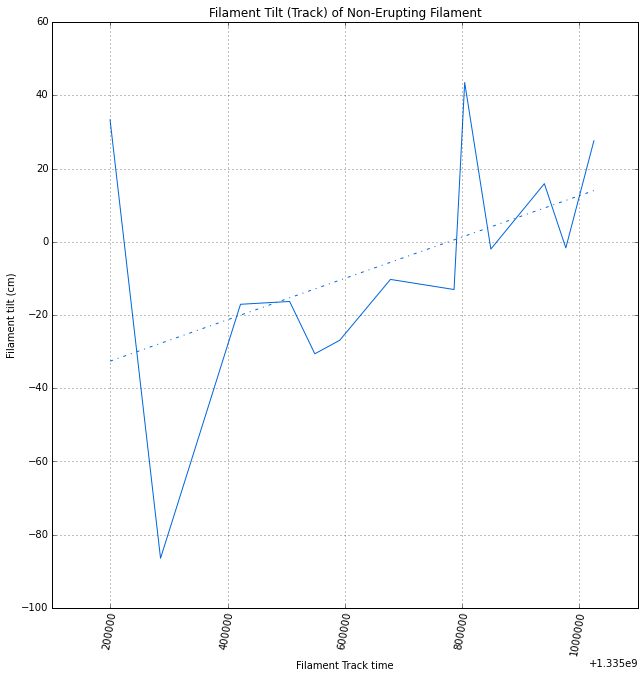

7.93106408426e-05


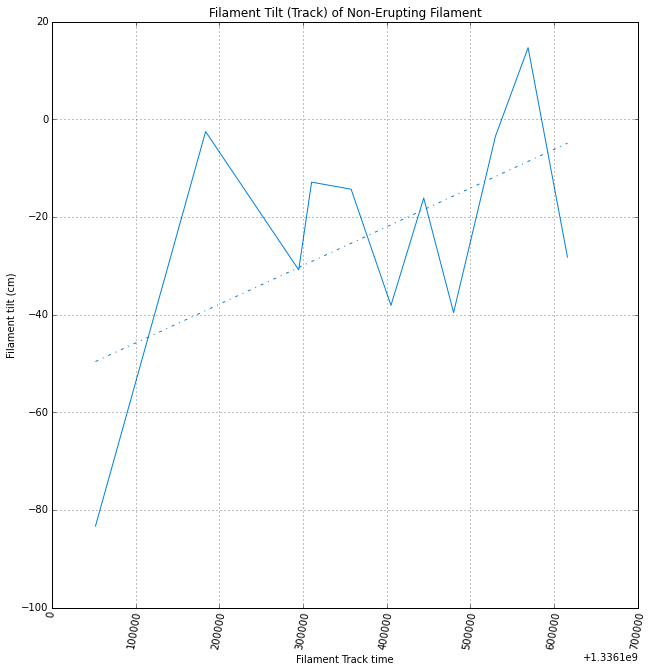

4.64101887886e-05


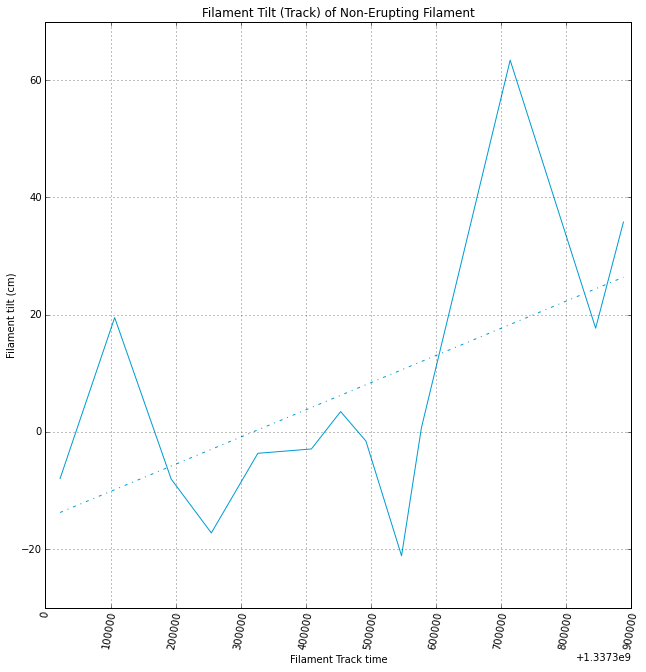

0.00020694840158


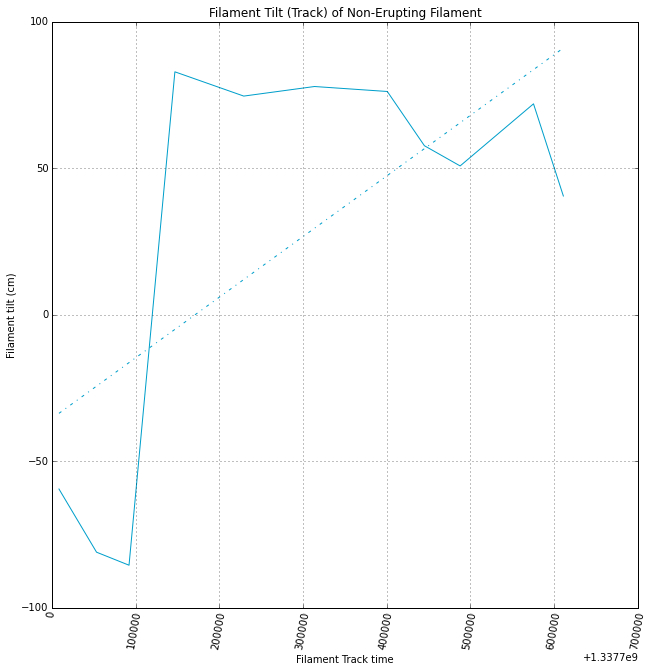

6.57348910591e-05


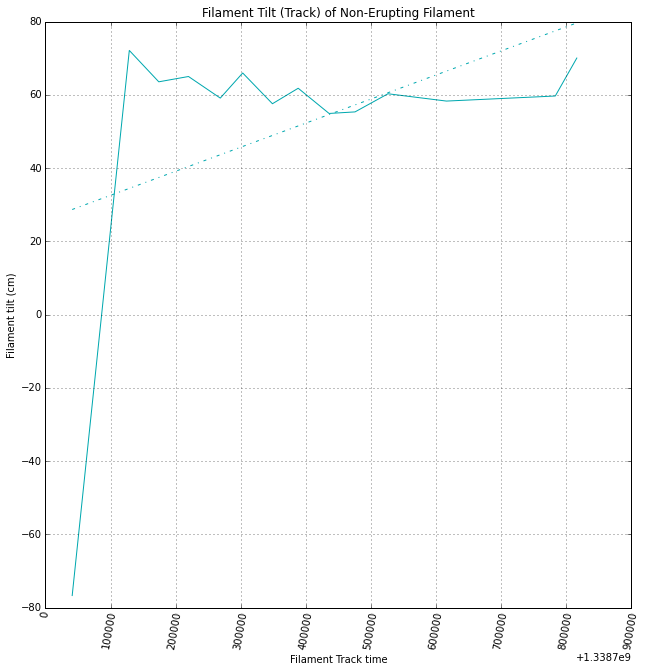

-0.000226601708929


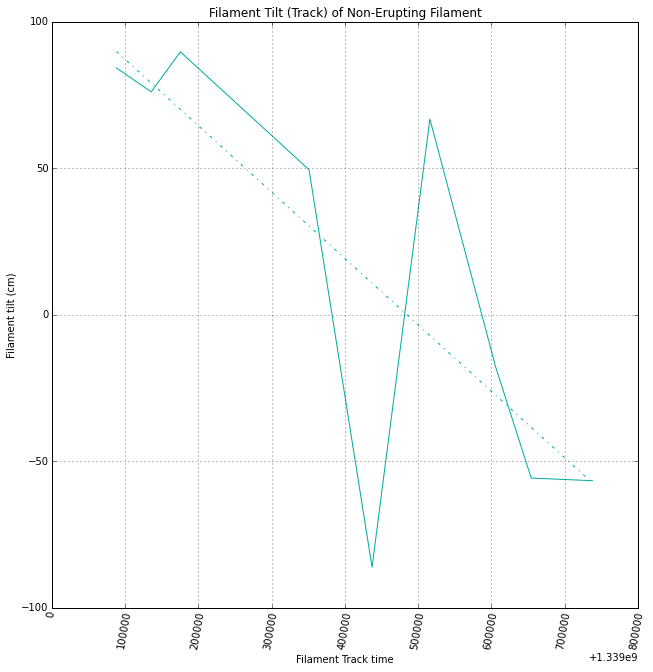

4.12221981141e-05


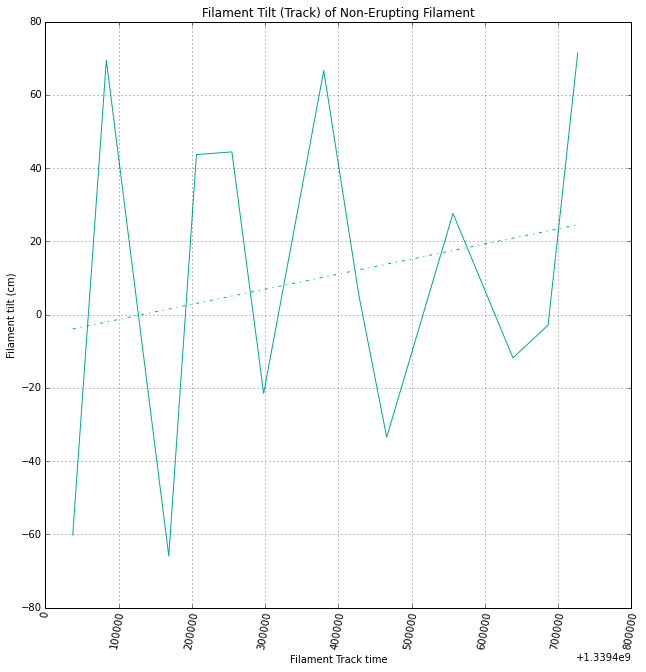

-3.97753821381e-05


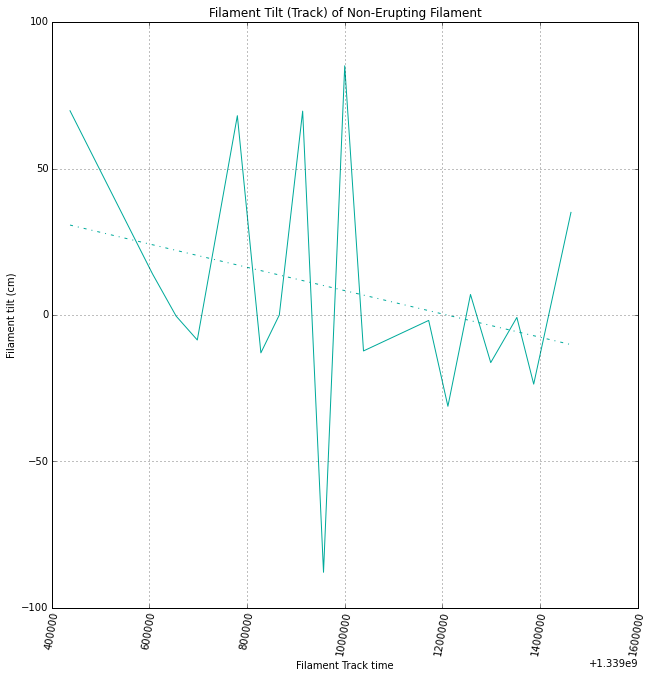

-3.54284592279e-05


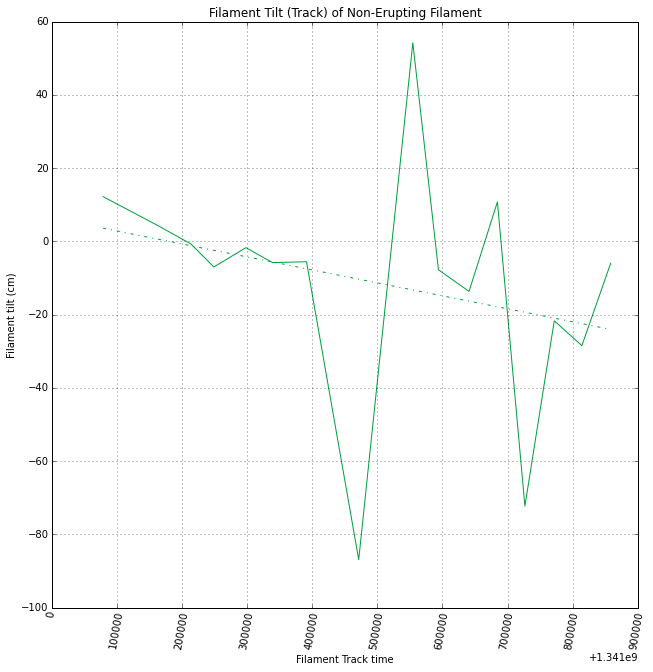

3.61346681869e-05


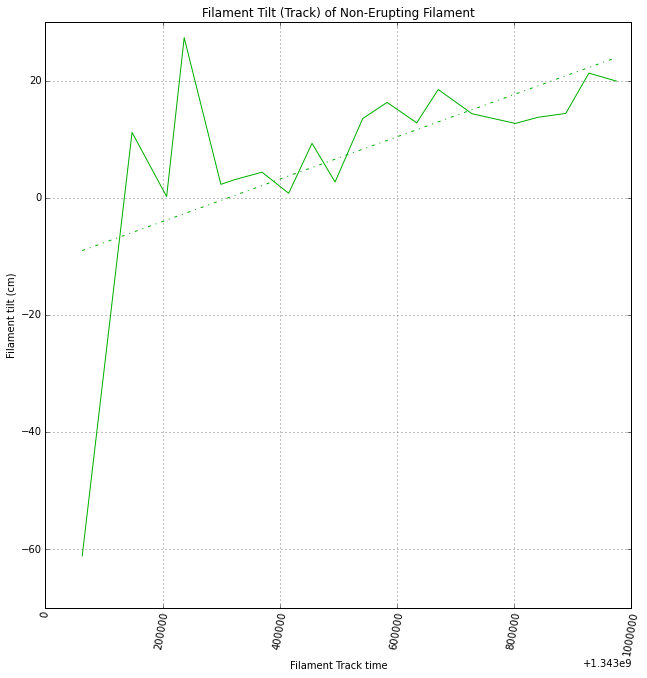

8.5992909612e-05


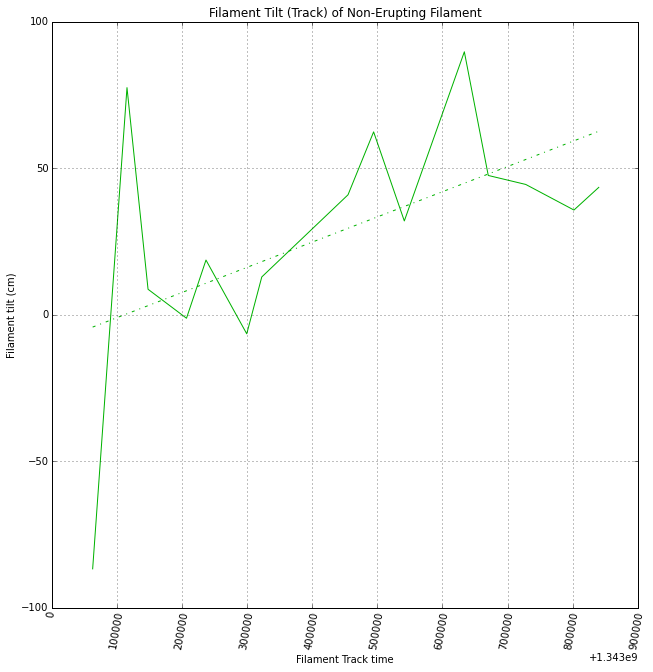

-3.62987808164e-05


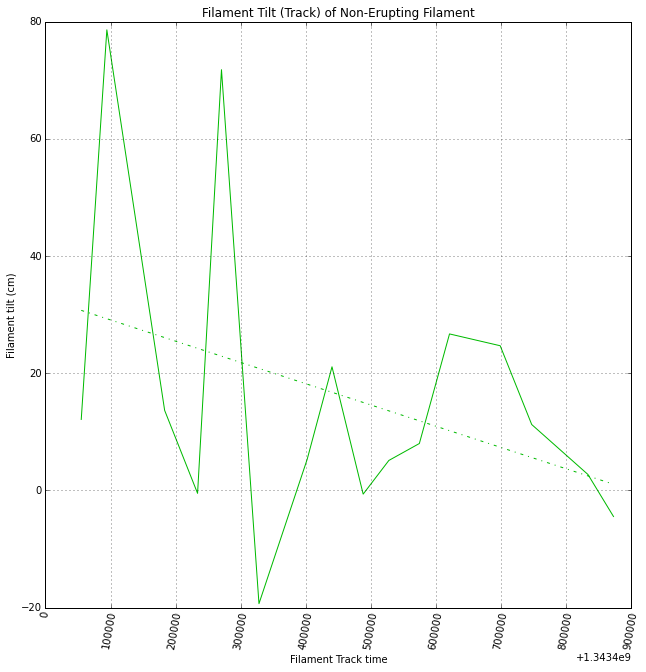

5.57912984448e-05


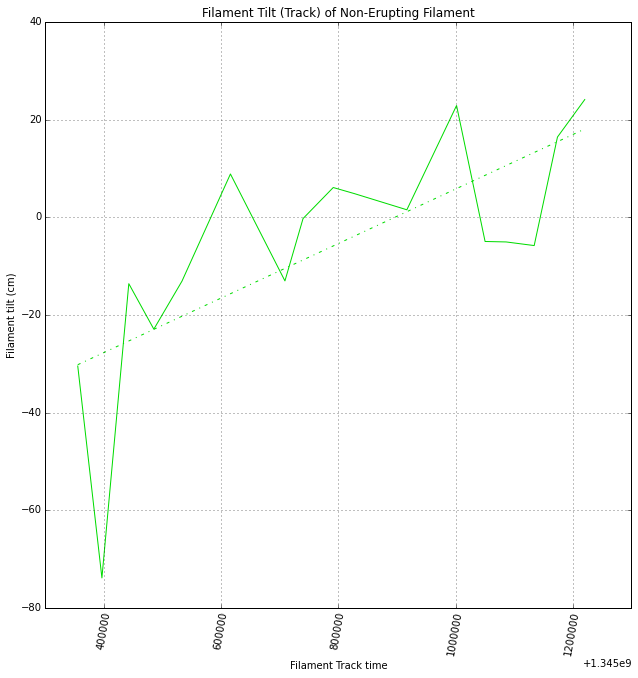

-6.59029791978e-05


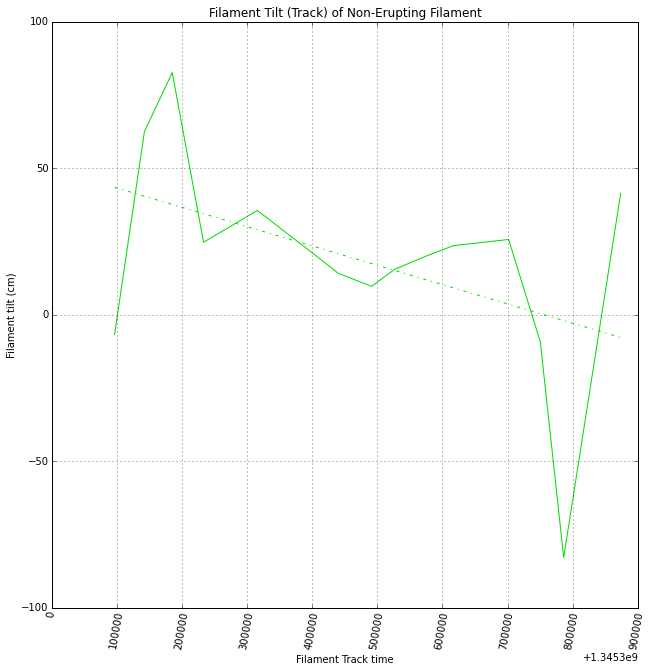

-1.87456124405e-05


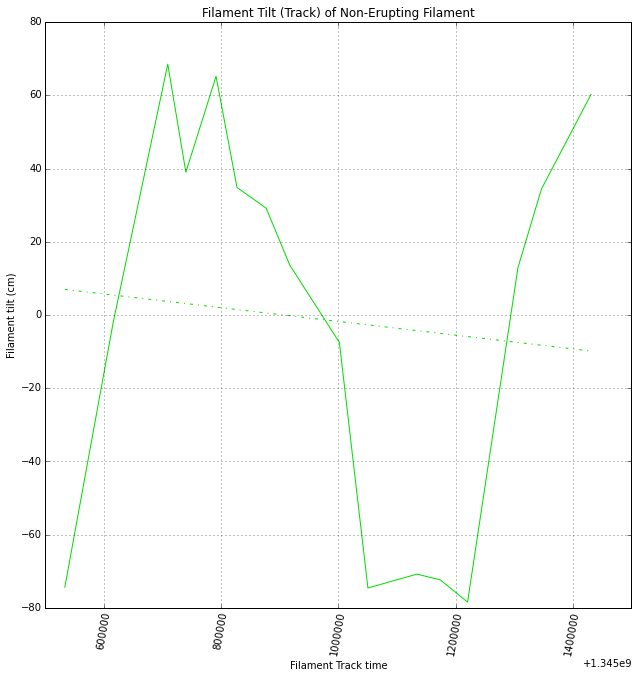

2.06522824429e-05


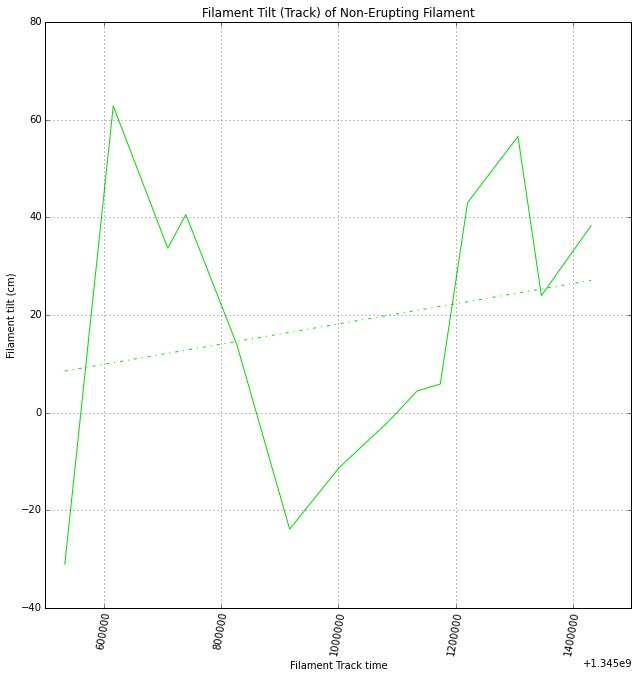

-3.0440446463e-05


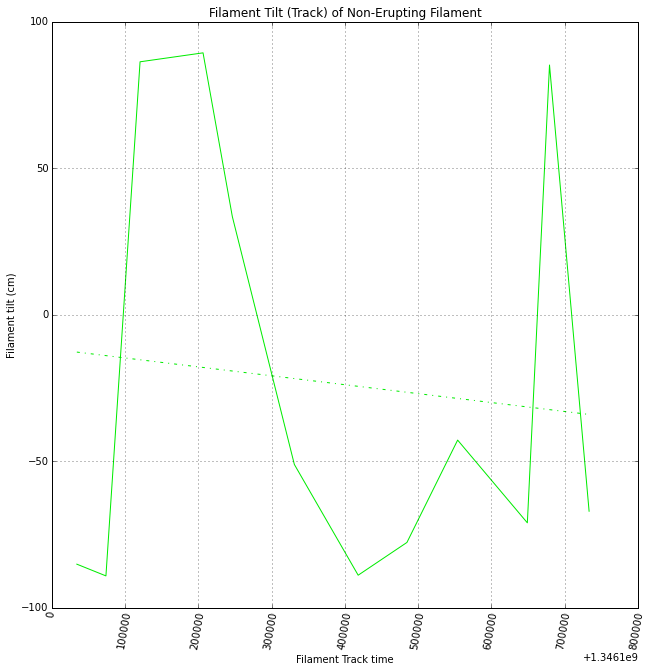

7.13137078975e-06


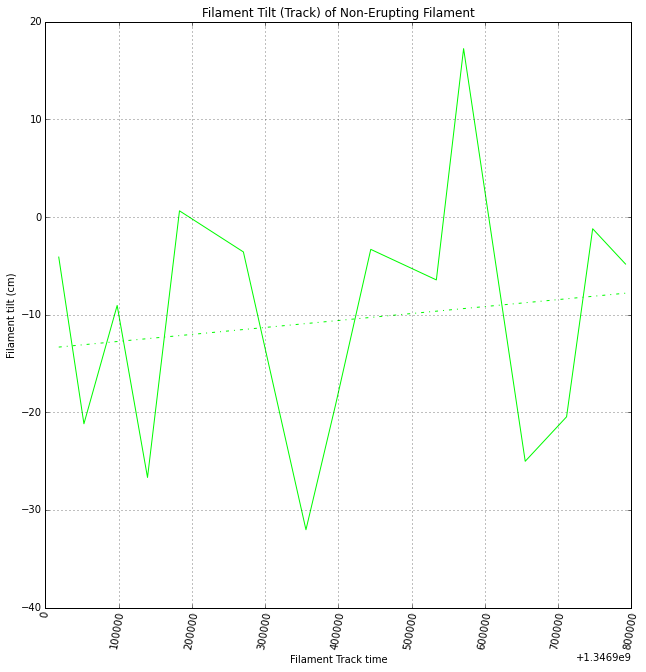

6.56024497752e-06


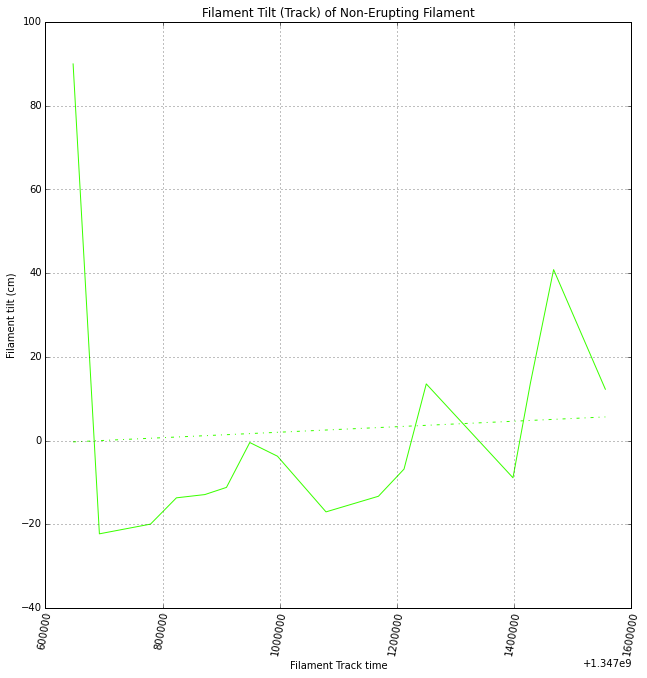

5.64197812315e-05


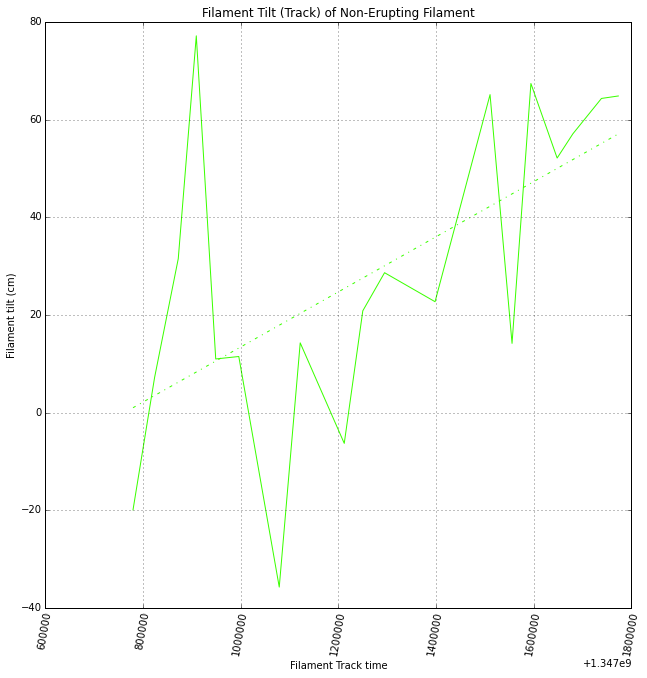

4.89302494369e-05


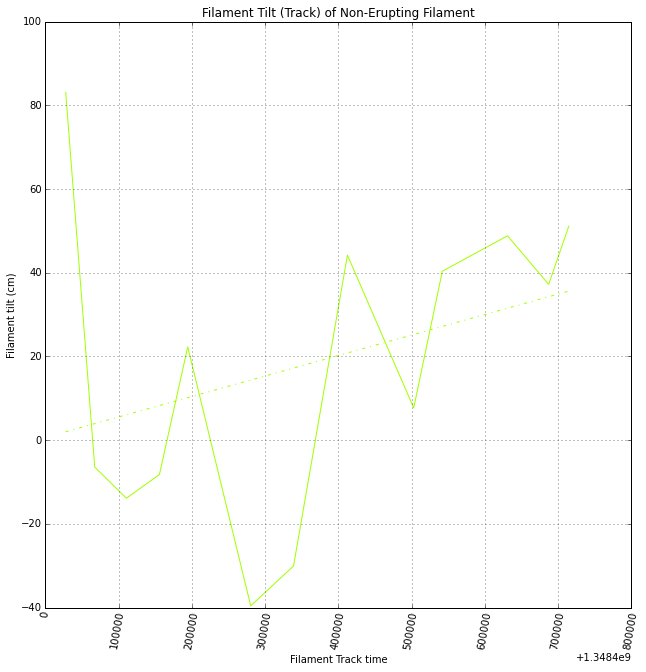

5.6293787345e-05


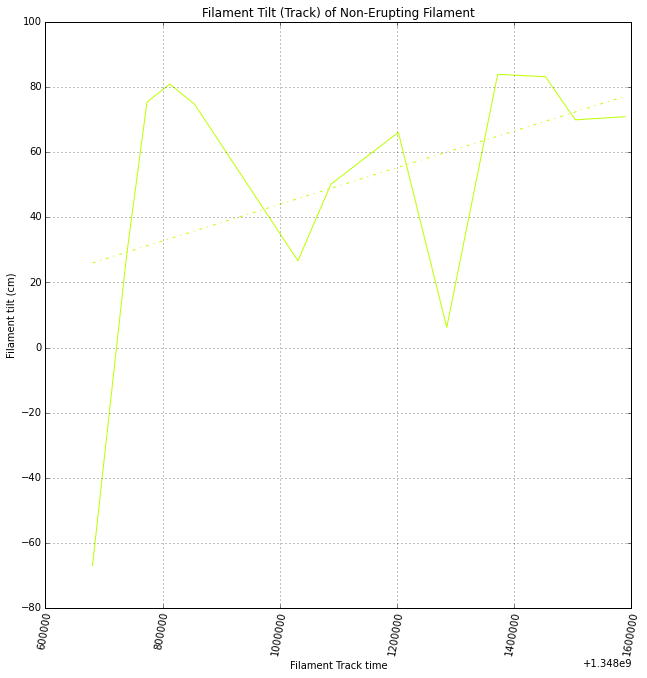

-3.30201675889e-07


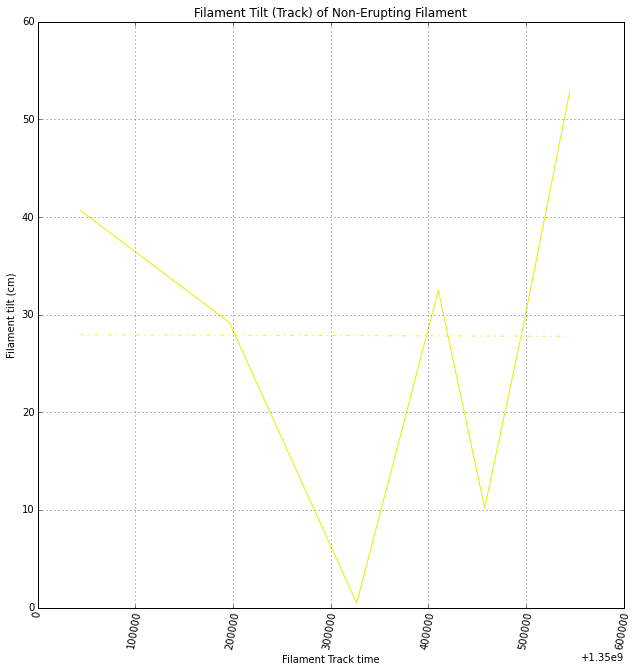

-6.30116088165e-05


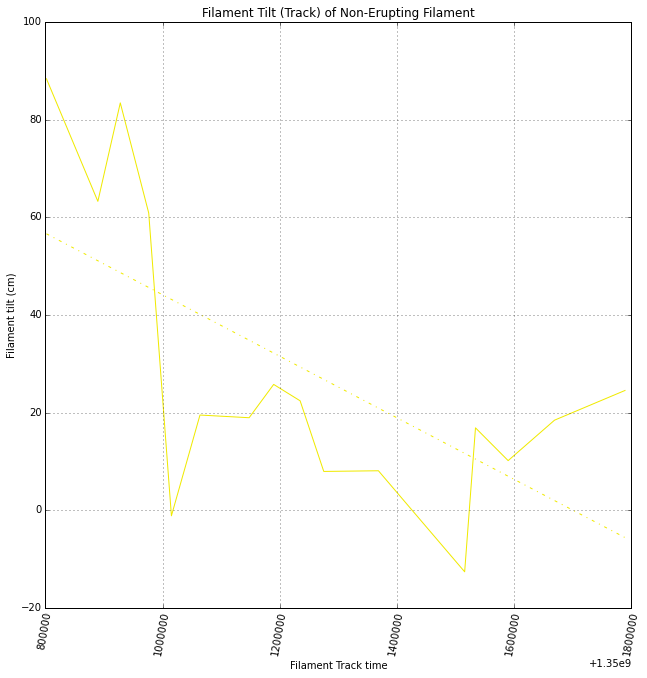

-5.34221775894e-05


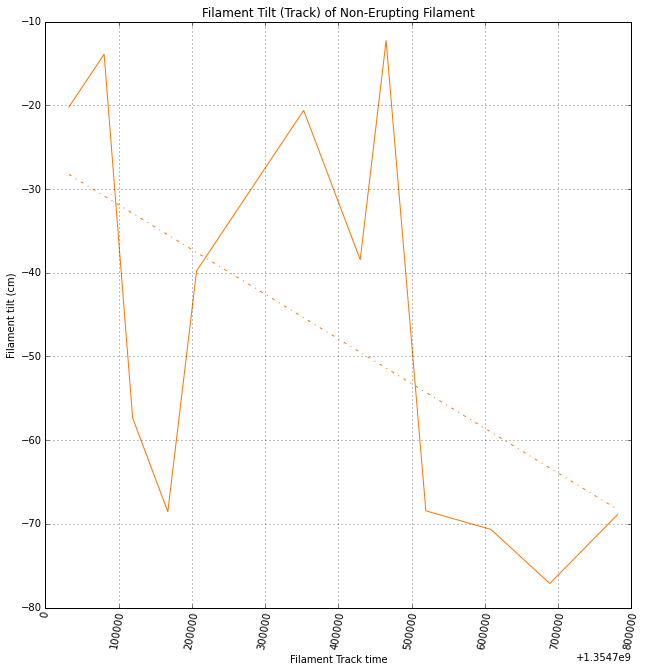

3.00449617819e-05


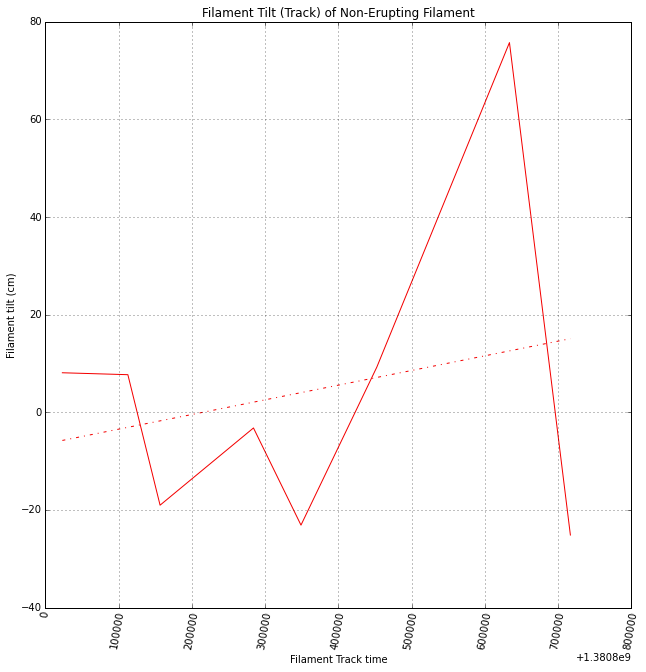

0.000291708971356


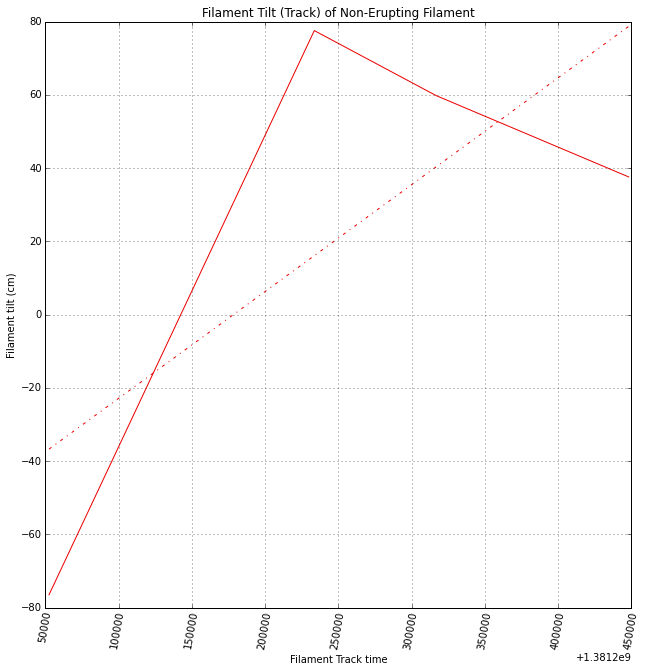

-3.28838296489e-05


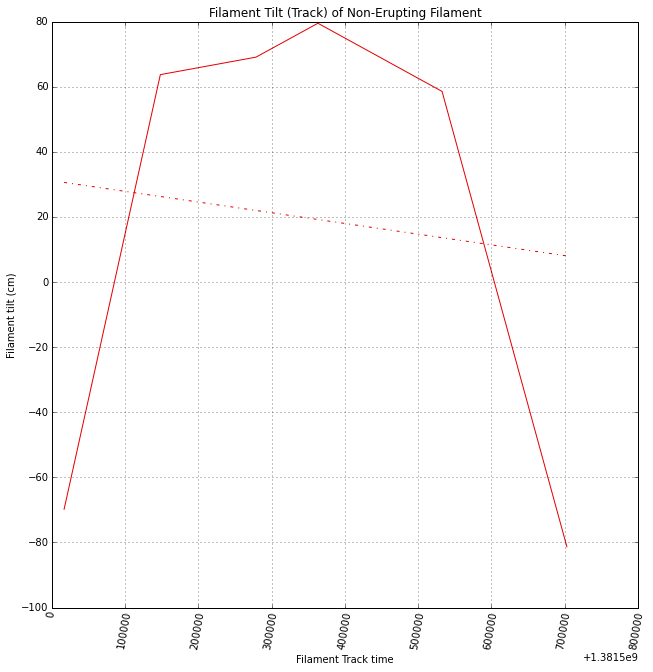

-0.000108921298524


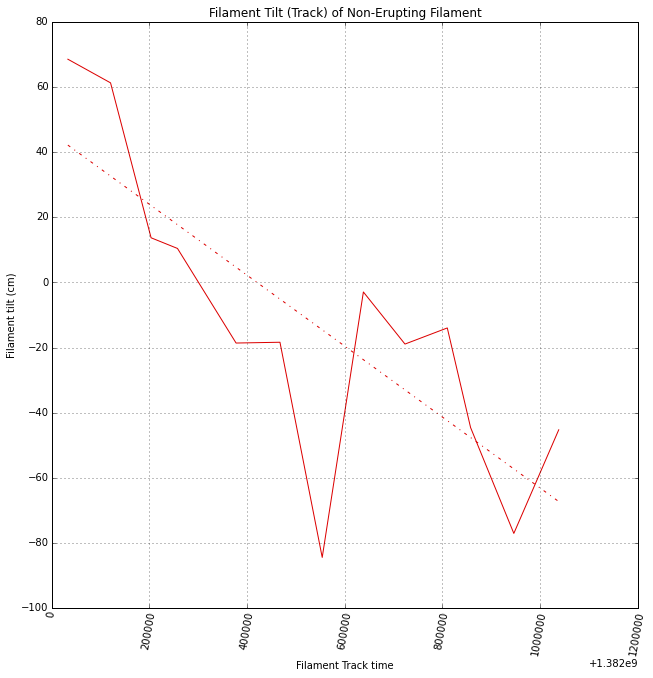

-7.68299322545e-05


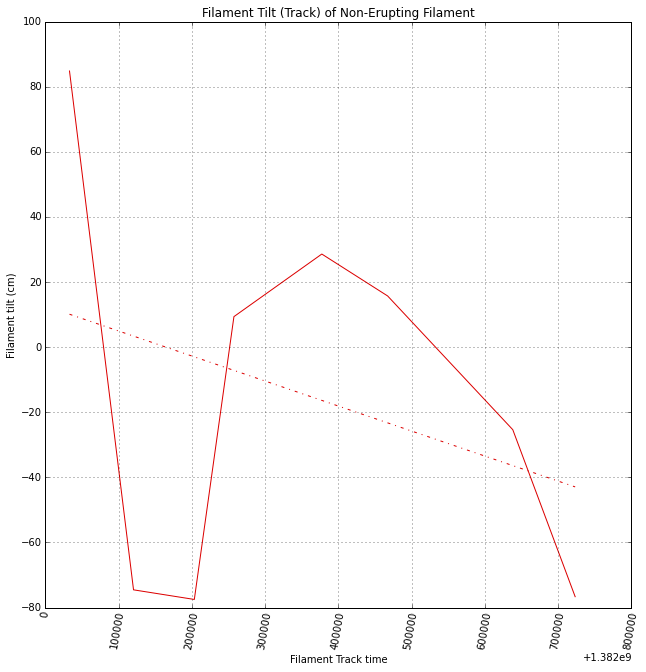

2.43009018886e-05


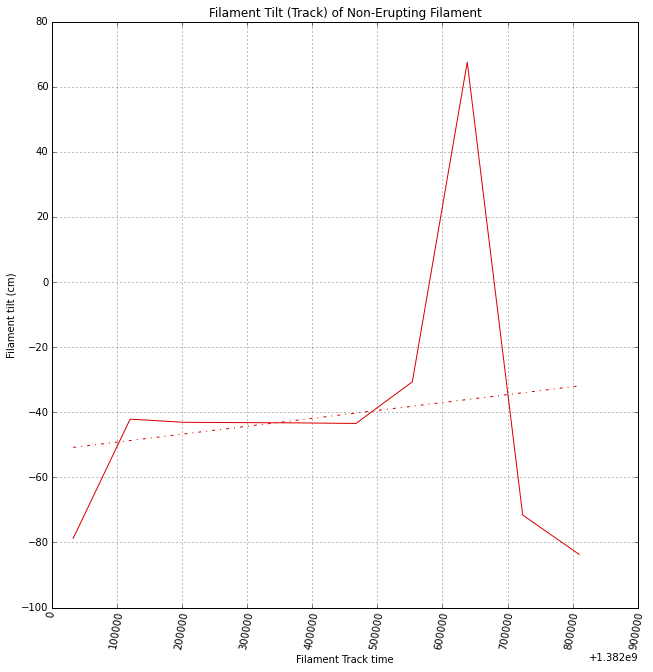

-0.000159029628447


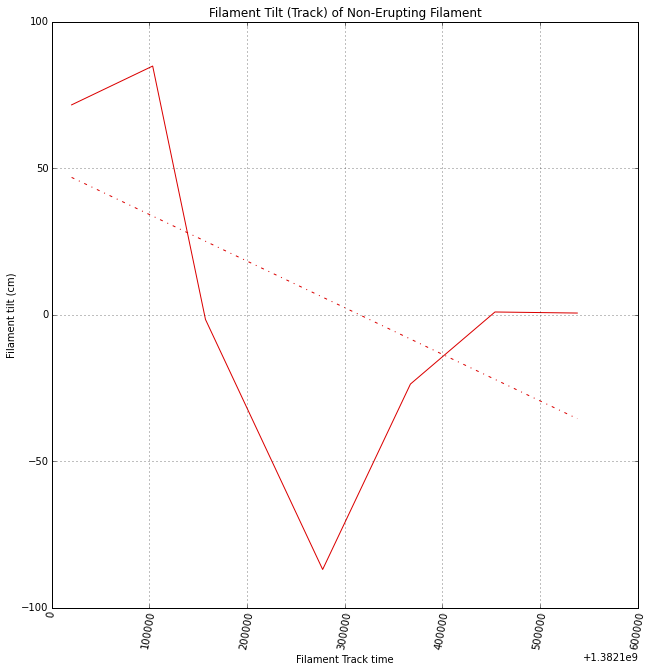

-8.11856845633e-05


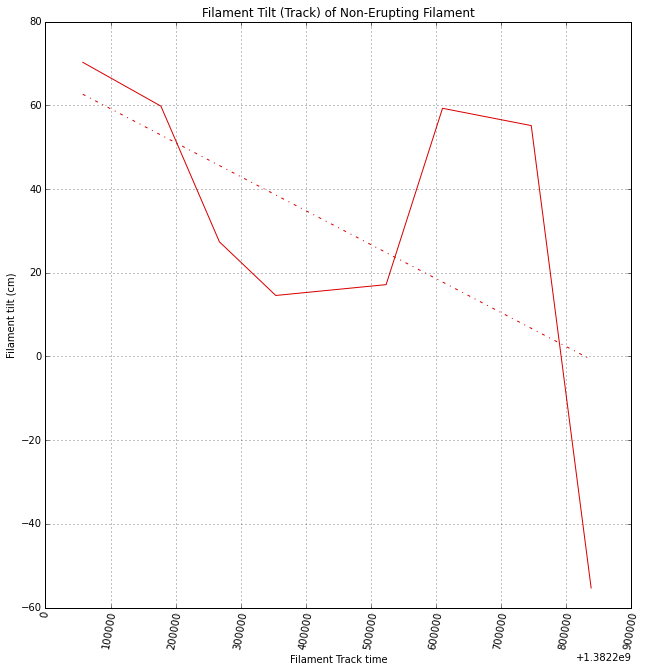

In [36]:
####to find the slopes before eruption
colorscale2=[]
norm = mpl.colors.Normalize(vmin=0, vmax=3500)
cmap = plt.get_cmap('nipy_spectral')
m = cm.ScalarMappable(norm=norm, cmap=cmap)
interest=[]
x=[]
y=[]
t=[]
tslope=[]
count_decrease=0
count_increase=0
count_nochange=0
all_tracks_trans=np.unique(all_tracks_trans)
for track in all_tracks_trans:
    scale3=m.to_rgba(track)
    x=[] ### will be time data
    y=[] ## will be length data 
    r=[]
    t=[]
    interest=[]
    tslope=[]
    for r in all_data_trans:      #iterates through the data 
        if r[0] == track:  #finds the correct track
            if r not in interest:
                 interest.append(r)   #appends the data to a new list
    for k in range(0, len(interest)):
        t1=parse(interest[k][1])  #filament time
        t.append(t1)
        y.append(interest[k][4])
        sec=(t1-datetime.datetime(1970,1,1)).total_seconds()
        tslope.append(sec)
    fit = np.polyfit(tslope, y,1)    ##fits around zero 
    slope, intercept= fit = np.polyfit(tslope, y,1)   ###gets slope
    time_fit_float = [float(int(x)) for x in tslope]  #makes the time values floats 
    line = [slope*each+intercept for each in time_fit_float] #Calculate the line points (y =mx+b)
    print slope
    if slope < 0:
        count_decrease+= 1
    if slope > 0:
        count_increase += 1
    if slope == 0:
        count_nochange +=1      
    plt.plot(tslope, y, color=scale3, linestyle='-')
    plt.plot(time_fit_float, line, '-.', color=scale3)   ##plots the line fit
    plt.title('Filament Tilt (Track) of Non-Erupting Filament')
    plt.grid(True)
    fig1 = plt.gcf()
    fig1.set_size_inches(10.5,10.5)
    plt.xlabel('Filament Track time')
    plt.ylabel('Filament tilt (cm)')
    plt.xticks( rotation= 80 )
    plt.show()
tilt_before=[count_decrease, count_nochange, count_increase]

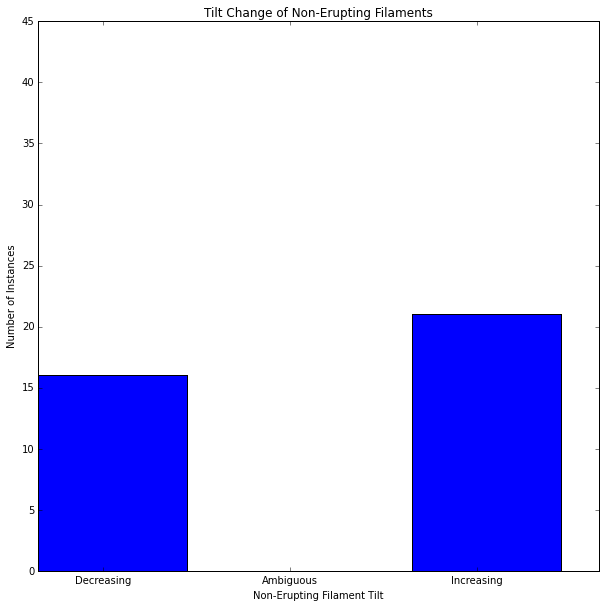

In [22]:
#bar plots, tilt changing? 
n_groups=3
index = np.arange(n_groups)
bar_width = 0.35
length_labels=['Decreasing', 'Ambiguous', 'Increasing']
plt.bar(index, tilt_before)
plt.xlabel('Non-Erupting Filament Tilt ')
plt.ylabel('Number of Instances')
plt.title('Tilt Change of Non-Erupting Filaments')
plt.xticks(index + bar_width, ('Decreasing', 'Ambiguous', 'Increasing'))
plt.ylim(0, 45)
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.tight_layout()
plt.show()